In [2]:
import os
import csv 
import numpy as np
import pandas as pd
import random
import math
import ast
import re
import regex
import string
import warnings

from collections import OrderedDict
from collections import defaultdict
from datetime import datetime
from datetime import date
from ast import literal_eval

import urllib
import requests
import json
import shutil
import time
import fnmatch
from pathlib import Path

from requests_html import AsyncHTMLSession
from urllib.parse import urlparse
from requests_html import HTMLSession

import PyPaperBot
import nltk
import fitz
from nltk.corpus import stopwords


from scidownl import scihub_download
import pickle
from text_preprocessing import preprocess_text
from text_preprocessing import *
from sentence_transformers import SentenceTransformer
from sentence_transformers import models
from sentence_transformers import util

import torch
from transformers import AutoTokenizer, AutoModel
#!pip3 install GPUtil
import gc
from GPUtil import showUtilization as gpu_usage
from numba import cuda

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#from requests_html import HTMLSession

# import nest_asyncio
# nest_asyncio.apply()

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)



[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/psych256lab/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
#nltk.download('stopwords')
stop_words = stopwords.words('english')

In [4]:
#!pip3 install sentence_transformers

In [5]:
# Successfully built sentence_transformers
# Installing collected packages: tokenizers, sentencepiece, huggingface-hub, 
#transformers, sentence_transformers
# Successfully installed huggingface-hub-0.14.0 
#sentence_transformers-2.2.2 
#sentencepiece-0.1.98 
#tokenizers-0.13.3 transformers-4.28.1


#conda update --all

In [6]:
#np.__version__

In [7]:
#!pip3 install regex
#!pip3 install requests-html
#!pip3 install PyMuPDF
#!pip3 install fitz

In [8]:
#!pip3 install PyPaperBot
#!pip3 install scidownl
#!pip3 install text-preprocessing
#!pip3 install textacy #==0.10.0

In [9]:
#!pip3 install git+https://github.com/chartbeat-labs/textacy.git

In [ ]:
!python -m spacy download en_core_web_sm

'''
    Successfully installed en-core-web-sm-3.5.0
    ✔ Download and installation successful
    You can now load the package via spacy.load('en_core_web_sm')'''

In [19]:
#from textacy import datasets
text = (
    "Many years later, as he faced the firing squad, Colonel Aureliano Buendía "
     "was to remember that distant afternoon when his father took him to discover ice. "
     "At that time Macondo was a village of twenty adobe houses, built on the bank "
     "of a river of clear water that ran along a bed of polished stones, which were "
     "white and enormous, like prehistoric eggs. The world was so recent "
     "that many things lacked names, and in order to indicate them it was necessary to point."
 )
doc = textacy.make_spacy_doc(text, lang="en_core_web_sm")
ts = textacy.text_stats.TextStats(doc)
ts.n_words
  #       137
  #       >>> ts.n_unique_words
  #       81
  #       >>> ts.entropy
  #       6.02267943673824
#ts1 = textacy.text_stats.TextStats.diversity(doc)
# ts.readability("flesch-kincaid-grade-level")
#   #       11.40259124087591
# ts.diversity("ttr")      

84

In [10]:
import textacy
from textacy import text_stats as ts
from textacy import extract
from textacy import preprocessing
from itertools import groupby
#from textacy.text_stats import basics, counts, diversity, readability

In [28]:


text = (
    "Many years later, as he faced the firing squad, Colonel Aureliano Buendía "
     "was to remember that distant afternoon when his father took him to discover ice. "
     "At that time Macondo was a village of twenty adobe houses, built on the bank "
     "of a river of clear water that ran along a bed of polished stones, which were "
     "white and enormous, like prehistoric eggs. The world was so recent "
     "that many things lacked names, and in order to indicate them it was necessary to point."
 )
doc = textacy.make_spacy_doc(text, lang="en_core_web_sm")
print(doc._.preview)



ts1 = ts.TextStats(doc)
#ts.n_sents(doc)
#print(ts1.entropy)
print("n words, n unique words, n long words",ts1.n_words, ts1.n_unique_words, ts1.n_long_words) #ts.basics.n_words(doc)
# (84, 66)
print("no of sent: ",ts1.n_sents)#n_sents(doc)
print("flesch_kincaid_grade_level: ",ts1.flesch_kincaid_grade_level)#readability
#10.922857142857143
print('automated_readability_index:',ts1.automated_readability_index)
print('flesch_reading_ease:',ts1.flesch_reading_ease)
print('smog_index: ',ts1.smog_index)

#ts1.ttr
#0.7857142857142857
#ts2 = ts.readability(doc)

#doc._.to_bag_of_words()
print("first word: ", next(extract.words(doc)))
#print(extract.keyterms.textrank(doc))
##preprocessing.remove.punctuation(text, only=[".", "?", "!"])
print(len(doc)) #no of tokens
# #next(iter(doc)) #tokens
# #ts.readability
# #ts.basics
# print(np.mean(ts1.n_chars_per_word))
# print(ts1.n_chars)
# print(np.mean(ts1.n_syllables_per_word))
# print(ts1.n_syllables)
# print(ts1.n_monosyllable_words)
# print(ts1.counts)
# doc.lang_

Doc(93 tokens: "Many years later, as he faced the firing squad,...")
n words, n unique words, n long words 84 66 14
no of sent:  3
flesch_kincaid_grade_level:  10.922857142857143
automated_readability_index: 13.428571428571423
flesch_reading_ease: 66.62214285714289
smog_index:  12.457975602129121
first word:  years
93


In [ ]:
#!conda install -c conda-forge textacy

In [8]:
#conda install -c conda-forge sentence-transformers
##pip install transformers -U

In [3]:
# for reproducibility
np.random.seed(1)

In [4]:
# # path to the data from overton
path="/home/psych256lab/Documents/Mokarrama/Thesis/Data"#"C:/Users/Z1936043/Documents/MJM/Thesis" 

# to store files in a list
csv_list = set()
 
# dirs=directories
for (root, dirs, files) in os.walk(path):
     for file in files:
            #print (root,dirs)
            if '.csv' in file:
                file=root.replace("\\", "/")+"/"+file
                #print(file)
                csv_list.add(file)
            #break
print(len(csv_list)) #{'C:/Users/Z1936043/Documents/MJM/Thesis/Data/PublishedDate/Others/parent/2011_articles-2023-03-12.csv'}

1289


https://stackoverflow.com/questions/36519086/how-to-get-rid-of-unnamed-0-column-in-a-pandas-dataframe-read-in-from-csv-fil 

In [5]:
# data integration: merging csv files
#%timeit 
df_articles = pd.concat(map(pd.read_csv, csv_list), ignore_index=True)

In [6]:
df_articles.to_csv("allArticlePolicyDataset.csv", encoding="utf-8", index=False)

In [7]:
df_articles = pd.read_csv("allArticlePolicyDataset.csv")

In [8]:
df_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333292 entries, 0 to 1333291
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   Title                  1332841 non-null  object
 1   DOI                    1333292 non-null  object
 2   Journal                1333292 non-null  object
 3   Published on           1333292 non-null  object
 4   Policy citation count  1333292 non-null  int64 
 5   URL                    1333292 non-null  object
 6   Cited by source ID     1333287 non-null  object
 7   Cited by source        1333287 non-null  object
 8   Cited by title         1332208 non-null  object
 9   Cited by date          1333287 non-null  object
 10  Cited by type          1333287 non-null  object
 11  Cited by subtype       561349 non-null   object
 12  Cited by country       1333287 non-null  object
 13  Cited by URL           1333287 non-null  object
 14  Document page          1333292 non

In [9]:
len(df_articles)

1333292

In [10]:
df_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333292 entries, 0 to 1333291
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   Title                  1332841 non-null  object
 1   DOI                    1333292 non-null  object
 2   Journal                1333292 non-null  object
 3   Published on           1333292 non-null  object
 4   Policy citation count  1333292 non-null  int64 
 5   URL                    1333292 non-null  object
 6   Cited by source ID     1333287 non-null  object
 7   Cited by source        1333287 non-null  object
 8   Cited by title         1332208 non-null  object
 9   Cited by date          1333287 non-null  object
 10  Cited by type          1333287 non-null  object
 11  Cited by subtype       561349 non-null   object
 12  Cited by country       1333287 non-null  object
 13  Cited by URL           1333287 non-null  object
 14  Document page          1333292 non

In [11]:
df_articles1 = df_articles.drop(df_articles.filter(regex="Unname"),axis=1)

## Data Preprocessing

In [12]:
#data duplicate removals
df_articles1.drop_duplicates(inplace=True)

In [13]:
df_articles1.drop_duplicates(subset=["URL", "Cited by URL"],inplace=True)

In [14]:
df_articles1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800495 entries, 0 to 1333287
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Title                  800159 non-null  object
 1   DOI                    800495 non-null  object
 2   Journal                800495 non-null  object
 3   Published on           800495 non-null  object
 4   Policy citation count  800495 non-null  int64 
 5   URL                    800495 non-null  object
 6   Cited by source ID     800491 non-null  object
 7   Cited by source        800491 non-null  object
 8   Cited by title         799864 non-null  object
 9   Cited by date          800491 non-null  object
 10  Cited by type          800491 non-null  object
 11  Cited by subtype       341784 non-null  object
 12  Cited by country       800491 non-null  object
 13  Cited by URL           800491 non-null  object
 14  Document page          800495 non-null  object
 15 

In [104]:
#for visualizing total citaions on different countries : chapter4
# df_articles1=df_articles.groupby(['DOI','Cited by country']).agg({'Cited by country':'count'})
# print(df_articles1)  // need to execute afyter filtering by year

In [105]:
 # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html

In [15]:
#selecting article data that are cited from the USA
usa_data=df_articles1[df_articles1['Cited by country']=='USA'].reset_index(inplace=False, drop=True)

In [16]:
usa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239627 entries, 0 to 239626
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Title                  239498 non-null  object
 1   DOI                    239627 non-null  object
 2   Journal                239627 non-null  object
 3   Published on           239627 non-null  object
 4   Policy citation count  239627 non-null  int64 
 5   URL                    239627 non-null  object
 6   Cited by source ID     239627 non-null  object
 7   Cited by source        239627 non-null  object
 8   Cited by title         239387 non-null  object
 9   Cited by date          239627 non-null  object
 10  Cited by type          239627 non-null  object
 11  Cited by subtype       102061 non-null  object
 12  Cited by country       239627 non-null  object
 13  Cited by URL           239627 non-null  object
 14  Document page          239627 non-null  object
 15  

In [108]:
# slower (116 ms ± 2.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each))
# %timeit usa_data.groupby("URL")["Cited by URL"].count().to_frame().reset_index().rename(columns={"Cited by URL":"USAcitationCount"})
# faster (49.5 ms ± 325 µs per loop (mean ± std. dev. of 7 runs, 10 loops each))
# %timeit usa_data["URL"].value_counts().to_frame().reset_index().rename(columns={"index":"URL","URL":"USAcitationCount"})

In [17]:
#counting usa policy citation of articles
article_count = usa_data["URL"].value_counts().to_frame().reset_index().rename(columns={"index":"URL","URL":"USAcitationCount"})
print(article_count)

                                                     URL  USAcitationCount
0                   https://doi.org/10.1093/ije/31.1.140               447
1              https://doi.org/10.1162/00335530360535135               304
2           https://doi.org/10.1371/journal.pmed.1000100               291
3         https://doi.org/10.1016/j.jclinepi.2011.01.012               235
4                https://doi.org/10.1001/jama.287.9.1132               232
...                                                  ...               ...
59442  https://doi.org/10.1111/j.1552-6909.2001.tb015...                 1
59443            https://doi.org/10.1053/nbin.2001.28100                 1
59444   https://doi.org/10.1203/00006450-200105000-00006                 1
59445              https://doi.org/10.1093/phr/116.2.122                 1
59446            https://doi.org/10.1053/sonu.2001.27922                 1

[59447 rows x 2 columns]


In [18]:
usa_data1=usa_data.merge(article_count, on="URL")

In [19]:
print(usa_data1.info())
# print(usa_data1.head(20))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239627 entries, 0 to 239626
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Title                  239498 non-null  object
 1   DOI                    239627 non-null  object
 2   Journal                239627 non-null  object
 3   Published on           239627 non-null  object
 4   Policy citation count  239627 non-null  int64 
 5   URL                    239627 non-null  object
 6   Cited by source ID     239627 non-null  object
 7   Cited by source        239627 non-null  object
 8   Cited by title         239387 non-null  object
 9   Cited by date          239627 non-null  object
 10  Cited by type          239627 non-null  object
 11  Cited by subtype       102061 non-null  object
 12  Cited by country       239627 non-null  object
 13  Cited by URL           239627 non-null  object
 14  Document page          239627 non-null  object
 15  

In [204]:
#df_articles1[df_articles1['DOI']=='10.1097/cmr.0000000000000586']#["Cited by URL"]

In [20]:
usa_data1 = usa_data1[usa_data1["Policy citation count"]>=usa_data1["USAcitationCount"]]

In [114]:
#beacuse of missing title, there are some policy citation counts that are less than USA citation count, assuming that in overton, total citation is measured on title count, not doi count, not sure thoug since when aggregating citation count on title, there were some discrepencies in data
#usa_data1["Policy citation count"] = np.where(usa_data1["Policy citation count"]<usa_data1["USA_CtationCount"],usa_data1["USA_CtationCount"],usa_data1["Policy citation count"])

In [115]:
#checking not null values for usa_data1
# print(usa_data1[usa_data1['Cited by title'].isnull()]["Cited by URL"].value_counts().sum())
# print(len(usa_data1[usa_data1["Cited by URL"] == 'https://www.courtinnovation.org/publications/protect-heal-thrive-lessons-learned-defending-childhood-demonstration-program']))
# print(len(df_articles1[df_articles1["Cited by URL"] == 'https://www.courtinnovation.org/publications/protect-heal-thrive-lessons-learned-defending-childhood-demonstration-program']))

In [21]:
#filtering dataframe with not null value of Title 
usa_data1=usa_data1[usa_data1.Title.notnull()].reset_index(drop=True)

In [22]:
usa_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233004 entries, 0 to 233003
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Title                  233004 non-null  object
 1   DOI                    233004 non-null  object
 2   Journal                233004 non-null  object
 3   Published on           233004 non-null  object
 4   Policy citation count  233004 non-null  int64 
 5   URL                    233004 non-null  object
 6   Cited by source ID     233004 non-null  object
 7   Cited by source        233004 non-null  object
 8   Cited by title         232764 non-null  object
 9   Cited by date          233004 non-null  object
 10  Cited by type          233004 non-null  object
 11  Cited by subtype       97060 non-null   object
 12  Cited by country       233004 non-null  object
 13  Cited by URL           233004 non-null  object
 14  Document page          233004 non-null  object
 15  

In [23]:
# check data 
usa_data1['Published on'].value_counts()

2005-01-01T00:00:00+00:00    2511
2002-01-01T00:00:00+00:00    2355
2004-01-01T00:00:00+00:00    2304
2007-01-01T00:00:00+00:00    2281
2010-01-01T00:00:00+00:00    2135
                             ... 
2022-04-19T00:00:00+00:00       1
2022-02-24T00:00:00+00:00       1
2022-04-20T00:00:00+00:00       1
2020-07-06T00:00:00+00:00       1
2012-10-24T00:00:00+00:00       1
Name: Published on, Length: 4666, dtype: int64

In [24]:
#filter by year
usa_data1['Published on']=pd.to_datetime(usa_data1['Published on'])

In [25]:
usa_data1['Cited by date'].value_counts()

an unknown date    2391
2017-02-23          951
2014-01-01          913
2017-01-26          906
2020-12-08          716
                   ... 
2020-08-08            1
2006-01-18            1
2000-02-02            1
2019-02-03            1
2018-07-21            1
Name: Cited by date, Length: 6329, dtype: int64

In [26]:
usa_data1=usa_data1[usa_data1['Cited by date']!='an unknown date'].reset_index(drop=True)


In [27]:
# https://stackoverflow.com/questions/42826388/using-time-zone-in-pandas-to-datetime 
usa_data1['Cited by date']=pd.to_datetime(usa_data1['Cited by date']).dt.tz_localize('UTC') 


In [213]:
#https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe

#!pip3 install swifter
#import swifter

# def getCitationLag2(row):
#     return (row[9]-row[3]).days 
# def getCitationLag3(citation_date, publication_date):
#     return (citation_date-publication_date).days
# %timeit usa_data1['citationLag'] =list(map(getCitationLag3,usa_data1['Cited by date'],usa_data1['Published on'])) #fastest
# %timeit usa_data1['citationLag']=usa_data1.swifter.apply(lambda x: getCitationLag3(x['Cited by date'],x['Published on']),axis=1)
# %timeit usa_data1['citationLag']=usa_data1.apply(lambda x: getCitationLag3(x['Cited by date'],x['Published on']),axis=1)
# %timeit usa_data1['citationLag'] =usa_data1.apply(getCitationLag2,axis=1)
# %timeit usa_data1['citationLag'] = np.vectorize(getCitationLag3) (usa_data1['Cited by date'].to_numpy(),usa_data1['Published on'].to_numpy())

In [28]:
def getCitationLag(citation_date, publication_date):
    return (citation_date-publication_date).days

In [29]:
usa_data1['citationLag'] =list(map(getCitationLag,usa_data1['Cited by date'],usa_data1['Published on']))

In [30]:
#usa_data1['citationLag']=usa_data1[(usa_data1['Cited by date']-usa_data1['Published on'])]
print(usa_data1['citationLag'])

0         3024
1         2157
2          801
3          996
4           58
          ... 
230608    1841
230609    1504
230610    4978
230611    4920
230612    7053
Name: citationLag, Length: 230613, dtype: int64


In [31]:
#normalize: shows percentage of values for each index value in dataset
usa_data1['citationLag'].value_counts(normalize=False).sort_index(ascending=True)[:1565] #.sort_values(ascending=True)

-37651     1
-37529     1
-37350     1
-8485      1
-6966      1
          ..
 40       35
 41       40
 42       55
 43       30
 44       31
Name: citationLag, Length: 1565, dtype: int64

In [32]:
usa_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230613 entries, 0 to 230612
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   Title                  230613 non-null  object             
 1   DOI                    230613 non-null  object             
 2   Journal                230613 non-null  object             
 3   Published on           230613 non-null  datetime64[ns, UTC]
 4   Policy citation count  230613 non-null  int64              
 5   URL                    230613 non-null  object             
 6   Cited by source ID     230613 non-null  object             
 7   Cited by source        230613 non-null  object             
 8   Cited by title         230398 non-null  object             
 9   Cited by date          230613 non-null  datetime64[ns, UTC]
 10  Cited by type          230613 non-null  object             
 11  Cited by subtype       96133 non-null  

In [33]:
usa_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230613 entries, 0 to 230612
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   Title                  230613 non-null  object             
 1   DOI                    230613 non-null  object             
 2   Journal                230613 non-null  object             
 3   Published on           230613 non-null  datetime64[ns, UTC]
 4   Policy citation count  230613 non-null  int64              
 5   URL                    230613 non-null  object             
 6   Cited by source ID     230613 non-null  object             
 7   Cited by source        230613 non-null  object             
 8   Cited by title         230398 non-null  object             
 9   Cited by date          230613 non-null  datetime64[ns, UTC]
 10  Cited by type          230613 non-null  object             
 11  Cited by subtype       96133 non-null  

In [34]:
data_start_date = pd.to_datetime("2000-1-1").tz_localize('UTC') #data_start_date = pd.to_datetime("2000-3-1", format="%Y-%m-%d").tz_localize('UTC')
data_end_date = pd.to_datetime("2022-12-31").tz_localize('UTC')
# print(data_start_date, data_end_date)
#print(data_end_date>data_start_date)

In [35]:
#if research paper and policy document publish on the same day, may be because same researcher is involved in both case, citation lag may be 0. 
# https://www.quora.com/How-long-does-it-take-for-a-paper-to-generate-citations 

usa_data1 = usa_data1[(usa_data1["Published on"]>=data_start_date) & (usa_data1['citationLag']>=0) & (usa_data1['Cited by date']<=data_end_date)].reset_index(drop=True)

In [36]:
usa_data1.head()

,Title,DOI,Journal,Published on,Policy citation count,URL,Cited by source ID,Cited by source,Cited by title,Cited by date,Cited by type,Cited by subtype,Cited by country,Cited by URL,Document page,Article funder(s),USAcitationCount,citationLag
0,Revisiting the Minimum Wage-Employment Debate:...,10.3386/w18681,National Bureau of Economic Research,2013-01-01 00:00:00+00:00,38,https://doi.org/10.3386/w18681,bostonfed,Federal Reserve Bank of Boston,The downstream benefits of higher incomes and ...,2021-04-13 00:00:00+00:00,government,bank,USA,https://www.bostonfed.org/publications/communi...,https://www.overton.io/document.php?policy_doc...,NaN,13,3024
1,Revisiting the Minimum Wage-Employment Debate:...,10.3386/w18681,National Bureau of Economic Research,2013-01-01 00:00:00+00:00,38,https://doi.org/10.3386/w18681,upjohninstitute,Upjohn Institute,Effects of the Minimum Wage on Employment Dyna...,2018-11-28 00:00:00+00:00,think tank,NaN,USA,https://research.upjohn.org/up_workingpapers/233,https://www.overton.io/document.php?policy_doc...,NaN,13,2157
2,Revisiting the Minimum Wage-Employment Debate:...,10.3386/w18681,National Bureau of Economic Research,2013-01-01 00:00:00+00:00,38,https://doi.org/10.3386/w18681,nber,NBER,Accounting for the Rise in C-sections: Evidenc...,2015-03-13 00:00:00+00:00,think tank,NaN,USA,https://data.nber.org/papers/w21022,https://www.overton.io/document.php?policy_doc...,NaN,13,801
3,Revisiting the Minimum Wage-Employment Debate:...,10.3386/w18681,National Bureau of Economic Research,2013-01-01 00:00:00+00:00,38,https://doi.org/10.3386/w18681,nber,NBER,Immigrant Employment and Earnings Growth in Ca...,2015-09-24 00:00:00+00:00,think tank,NaN,USA,https://www.nber.org/papers/w21591?sy=591,https://www.overton.io/document.php?policy_doc...,NaN,13,996
4,Revisiting the Minimum Wage-Employment Debate:...,10.3386/w18681,National Bureau of Economic Research,2013-01-01 00:00:00+00:00,38,https://doi.org/10.3386/w18681,heritagefoundation,Heritage Foundation,Who Earns the Minimum Wage? Suburban Teenagers...,2013-02-28 00:00:00+00:00,think tank,NaN,USA,https://www.heritage.org/jobs-and-labor/report...,https://www.overton.io/document.php?policy_doc...,NaN,13,58


In [37]:
usa_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222668 entries, 0 to 222667
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   Title                  222668 non-null  object             
 1   DOI                    222668 non-null  object             
 2   Journal                222668 non-null  object             
 3   Published on           222668 non-null  datetime64[ns, UTC]
 4   Policy citation count  222668 non-null  int64              
 5   URL                    222668 non-null  object             
 6   Cited by source ID     222668 non-null  object             
 7   Cited by source        222668 non-null  object             
 8   Cited by title         222458 non-null  object             
 9   Cited by date          222668 non-null  datetime64[ns, UTC]
 10  Cited by type          222668 non-null  object             
 11  Cited by subtype       92774 non-null  

In [38]:
usa_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222668 entries, 0 to 222667
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   Title                  222668 non-null  object             
 1   DOI                    222668 non-null  object             
 2   Journal                222668 non-null  object             
 3   Published on           222668 non-null  datetime64[ns, UTC]
 4   Policy citation count  222668 non-null  int64              
 5   URL                    222668 non-null  object             
 6   Cited by source ID     222668 non-null  object             
 7   Cited by source        222668 non-null  object             
 8   Cited by title         222458 non-null  object             
 9   Cited by date          222668 non-null  datetime64[ns, UTC]
 10  Cited by type          222668 non-null  object             
 11  Cited by subtype       92774 non-null  

In [225]:
#usa_data1['citationLag'].value_counts(normalize=False).sort_index(ascending=True)[:1565]

In [226]:
# filter 
usa_data1['Cited by title'].notnull().value_counts()

True     222424
False       210
Name: Cited by title, dtype: int64

In [227]:
usa_data1 = usa_data1[usa_data1['Cited by title'].notnull()].reset_index(drop=True)

In [228]:
usa_data1['Article funder(s)'] = usa_data1['Article funder(s)'].fillna('notFunded')
usa_data1['Cited by subtype'] = usa_data1['Cited by subtype'].fillna('others')

In [229]:
lag_stat_data=usa_data1.groupby(['DOI'])['citationLag'].agg({"min","mean","max"}).reset_index().rename(columns={"min":"minCitationLag", "max":"maxCitationLag", "mean": "meanCitationLag"})
#print(lag_stat_data)
usa_data2=usa_data1.merge(lag_stat_data, on='DOI')
#unique_article_data=unique_usa_data.drop_duplicates('DOI').reset_index(drop=True)

In [231]:
usa_data2#.info()

,Title,DOI,Journal,Published on,Policy citation count,URL,Cited by source ID,Cited by source,Cited by title,Cited by date,...,Cited by subtype,Cited by country,Cited by URL,Document page,Article funder(s),USAcitationCount,citationLag,meanCitationLag,minCitationLag,maxCitationLag
0,Using Teacher-Written Praise Notes to Promote ...,10.1080/10459880903217895,Preventing School Failure: Alternative Educati...,2009-10-09 00:00:00+00:00,1,https://doi.org/10.1080/10459880903217895,marylandgov,State of Maryland,Collateral Damage in the Classroom,2014-03-20 00:00:00+00:00,...,others,USA,http://dls.maryland.gov/pubs/prod/NoPblTabMtg/...,https://www.overton.io/document.php?policy_doc...,notFunded,1,1623,1623.0,1623,1623
1,Wireless sensor network based wearable smart s...,10.1016/j.snb.2009.04.040,Sensors and Actuators B: Chemical,2009-07-01 00:00:00+00:00,2,https://doi.org/10.1016/j.snb.2009.04.040,aspehhsgovus,ASPE,Report to Congress: Aging Services Technology ...,2012-08-13 00:00:00+00:00,...,others,USA,https://aspe.hhs.gov/reports/report-congress-a...,https://www.overton.io/document.php?policy_doc...,notFunded,2,1139,1139.0,1139,1139
2,Wireless sensor network based wearable smart s...,10.1016/j.snb.2009.04.040,Sensors and Actuators B: Chemical,2009-07-01 00:00:00+00:00,2,https://doi.org/10.1016/j.snb.2009.04.040,aspehhsgovus,ASPE,Report to Congress: Aging Services Technology ...,2012-08-13 00:00:00+00:00,...,others,USA,https://aspe.hhs.gov/reports/report-congress-a...,https://www.overton.io/document.php?policy_doc...,notFunded,2,1139,1139.0,1139,1139
3,Therapeutic outcomes in 1000 cases of endoscop...,10.1016/j.gie.2008.09.027,Gastrointestinal Endoscopy,2009-06-01 00:00:00+00:00,1,https://doi.org/10.1016/j.gie.2008.09.027,bmj_asge,American Society for Gastrointestinal Endoscopy,The role of endoscopy in the management of pre...,2015-06-09 00:00:00+00:00,...,professional association,USA,https://www.asge.org/docs/default-source/educa...,https://www.overton.io/document.php?policy_doc...,notFunded,1,2199,2199.0,2199,2199
4,Effect of β2-Adrenergic Receptor Polymorphism ...,10.3349/ymj.2009.50.2.182,Yonsei Medical Journal,2009-01-01 00:00:00+00:00,1,https://doi.org/10.3349/ymj.2009.50.2.182,ahrq,AHRQ,Intermittent Inhaled Corticosteroids and Long-...,2018-02-28 00:00:00+00:00,...,healthcare agency,USA,https://effectivehealthcare.ahrq.gov/products/...,https://www.overton.io/document.php?policy_doc...,notFunded,1,3345,3345.0,3345,3345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222419,Special Issue Introduction: The Meaning and Me...,10.1007/s10964-010-9531-8,Journal of Youth and Adolescence,2010-07-01 00:00:00+00:00,3,https://doi.org/10.1007/s10964-010-9531-8,randcorporation,RAND Corporation,Positive Youth Development in a School-Based S...,2015-02-18 00:00:00+00:00,...,research center,USA,https://www.rand.org/pubs/rgs_dissertations/RG...,https://www.overton.io/document.php?policy_doc...,notFunded,1,1693,1693.0,1693,1693
222420,School Connectedness Buffers the Effects of Ne...,10.1111/j.1532-7795.2009.00632.x,Journal of Research on Adolescence,2010-03-01 00:00:00+00:00,3,https://doi.org/10.1111/j.1532-7795.2009.00632.x,stateofhawaiigov,State of Hawaii,312345678,2020-08-10 00:00:00+00:00,...,others,USA,https://boe.hawaii.gov/Meetings/Notices/Meetin...,https://www.overton.io/document.php?policy_doc...,notFunded,2,3815,3815.0,3815,3815
222421,School Connectedness Buffers the Effects of Ne...,10.1111/j.1532-7795.2009.00632.x,Journal of Research on Adolescence,2010-03-01 00:00:00+00:00,3,https://doi.org/10.1111/j.1532-7795.2009.00632.x,stateofhawaiigov,State of Hawaii,312345678,2020-08-10 00:00:00+00:00,...,others,USA,http://boe.hawaii.gov/Meetings/Notices/Meeting...,https://www.overton.io/document.php?policy_doc...,notFunded,2,3815,3815.0,3815,3815
222422,Childhood exposure to sexual abuse and partner...,10.1017/s0033291709990389,Psychological Medicine,2010-04-01 00:00:00+00:00,3,https://doi.org/10.1017/s

In [232]:
#usa_data2.head(5)

#usa_data2.to_csv("USAcitations.csv", encoding = "utf-8", index = False, date_format='%Y-%m-%d')


## Data processing and dataset selection for similarity task


In [5]:
usa_data2= pd.read_csv("USAcitations.csv", encoding="utf-8")

In [6]:
usa_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222424 entries, 0 to 222423
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Title                  222424 non-null  object 
 1   DOI                    222424 non-null  object 
 2   Journal                222424 non-null  object 
 3   Published on           222424 non-null  object 
 4   Policy citation count  222424 non-null  int64  
 5   URL                    222424 non-null  object 
 6   Cited by source ID     222424 non-null  object 
 7   Cited by source        222424 non-null  object 
 8   Cited by title         222424 non-null  object 
 9   Cited by date          222424 non-null  object 
 10  Cited by type          222424 non-null  object 
 11  Cited by subtype       222424 non-null  object 
 12  Cited by country       222424 non-null  object 
 13  Cited by URL           222424 non-null  object 
 14  Document page          222424 non-nu

#1 select relevant columns
visual statistics of usa citation count 
decide how many citation range to consider
#2
pdf download
{code update: title match with pdf links, some links doesn't have extension .pdf, }
{domain list, check error msg, articles with same domain: same result(access or no access)}
#3
embedding generation (different models)
 [why choose those models]
 criteria: semantic, transformer-based, year of publication, api publicly available to use
 
similarity: councurrently or separately? {half the documents}
#4
Statiastical test (for each output)
 
steps 2 and 3 for both RD and PD
 
 

In [47]:
# rename_col={'mean': 'mean_citation_lag',
#         'max': 'max_citation_lag',
#         'min': 'min_citation_lag'}
# unique_usa_data1.rename(columns=rename_col, inplace=True)

In [7]:
filteredUsaData = usa_data2[["Title", "URL", "Cited by title", "Cited by URL", "USAcitationCount"]]

In [8]:
filteredUsaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222424 entries, 0 to 222423
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Title             222424 non-null  object
 1   URL               222424 non-null  object
 2   Cited by title    222424 non-null  object
 3   Cited by URL      222424 non-null  object
 4   USAcitationCount  222424 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 8.5+ MB


In [143]:
#filteredUsaData.info()

In [9]:
rename_col = {
                "Title":"title", 
                "URL":"url", 
                "Cited by title":"citedByTitle", 
                "Cited by URL":"citedByURL",
                "USAcitationCount":"USAcitationCount" }

filteredUsaData = filteredUsaData.rename(columns=rename_col)

In [10]:
filteredUsaData["url"].nunique()

56415

In [11]:
artilcePolicyList = filteredUsaData.groupby(["url","title"]).aggregate({"citedByURL":list, "citedByTitle":list}).reset_index()#.agg({"min","mean","max"}).reset_index()

In [260]:
#artilcePolicyList = filteredUsaData.groupby(["url","title"])[["citedByURL"]].apply(list).reset_index(name='policyList')#.agg({"min","mean","max"}).reset_index()

In [12]:
#artilcePolicyList.index.set_names([['policyList',"policyTitles"]])#.iloc[50,1]
artilcePolicyList = artilcePolicyList.rename(columns ={'citedByURL': 'policyList', 'citedByTitle':'policyTitles'})#.iloc[50,1]

In [13]:
#add titles for articles and policies
artilcePolicyList.columns


Index(['url', 'title', 'policyList', 'policyTitles'], dtype='object')

In [14]:
#def getCitation(policyList):
#     return len(policyList)

# %timeit artilcePolicyList['USApolicyCitation'] = [*map(getCitation,artilcePolicyList["policyList"])]

# # 20.3 ms ± 246 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

%timeit artilcePolicyList['USApolicyCitation'] = artilcePolicyList["policyList"].apply(len)#fastest



7.8 ms ± 65.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
artilcePolicyList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56415 entries, 0 to 56414
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   url                56415 non-null  object
 1   title              56415 non-null  object
 2   policyList         56415 non-null  object
 3   policyTitles       56415 non-null  object
 4   USApolicyCitation  56415 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.2+ MB


In [148]:
#artilcePolicyList.drop(["USApolicyCitation1", "USApolicyCitation2"], axis=1, inplace = True)

In [149]:
#filteredUsaData[filteredUsaData["url"]=="https://doi.org/10.9778/cmajo.20140047"]
# artilcePolicyList.merge(filteredUsaData, on='url')

In [327]:
artilcePolicyList#.drop(['USACitation'], axis=1, inplace =True)

,url,title,policyList,policyTitles,USApolicyCitation
0,https://doi.org/10.1001/2013.jamainternmed.727,Repeat Testing Among Medicare Beneficiaries,[https://effectivehealthcare.ahrq.gov/products...,[Data Points #20: Echocardiography Trends],1
1,https://doi.org/10.1001/2013.jamapediatrics.319,Response of Severely Obese Children and Adoles...,[https://asmbs.org/app/uploads/2018/08/PIIS155...,[ASMBS Pediatric Metabolic and Bariatric Surge...,1
2,https://doi.org/10.1001/amajethics.2019.603,How Should Unaccompanied Minors in Immigration...,[https://www.americanprogress.org/issues/women...,[Immigration Detention Is Dangerous for Women’...,1
3,https://doi.org/10.1001/archderm.138.12.1584,Acne Vulgaris,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,[Approaches to limit systemic antibiotic use i...,1
4,https://doi.org/10.1001/archderm.138.3.370,The First International Consensus on Mucous Me...,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,[European guidelines (S3) on diagnosis and man...,3
...,...,...,...,...,...
52274,https://doi.org/10.9778/cmajo.20140047,Treatment of overweight and obesity in childre...,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,"[Recommendations for growth monitoring, and pr...",4
52275,https://doi.org/10.9778/cmajo.20190026,Cannabis use during methadone maintenance trea...,[http://jlarc.virginia.gov/pdfs/reports/Rpt542...,[Report to the Governor and the General Assemb...,3
52276,https://doi.org/10.9783/9780812208436.121,Chapter 6. Community College Occupational Degr...,[https://www.urban.org/research/publication/fe...,[Federal Investments in Job Training at Commun...,1
52277,https://doi.org/10.9784/leb2(4)foster.01,A Review of the Biology and Conservation of th...,[https://wdfw.wa.gov/sites/default/files/publi...,[APPENDIXF],1


In [295]:
#artilcePolicyList.to_csv("articlePolicyList.csv", encoding="utf-8", index = False)

#### Break....

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
##artilcePolicyList1= artilcePolicyList
artilcePolicyList1 = pd.read_csv("articlePolicyList.csv", encoding="utf-8")

In [4]:
artilcePolicyList1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56415 entries, 0 to 56414
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   url                56415 non-null  object
 1   title              56415 non-null  object
 2   policyList         56415 non-null  object
 3   policyTitles       56415 non-null  object
 4   USApolicyCitation  56415 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.2+ MB


In [305]:
# artilcePolicyList['USACitation'] = artilcePolicyList["policyTitles"].apply(len)
# artilcePolicyList[artilcePolicyList['USACitation']!=artilcePolicyList['USApolicyCitation']]

In [6]:
artilcePolicyList1['USApolicyCitation'].value_counts(normalize=True)[0:20]*100

1     46.790747
2     17.800230
3      9.401755
4      5.752016
5      3.759638
6      2.843215
7      2.205087
8      1.699903
9      1.361340
10     1.054684
11     0.889834
12     0.767526
13     0.597359
14     0.537091
15     0.467961
16     0.365151
17     0.299566
18     0.290703
19     0.264114
20     0.214482
Name: USApolicyCitation, dtype: float64

In [152]:
#proportionate stratified sampling https://www.geeksforgeeks.org/stratified-sampling-in-pandas/ 
#sampledArtilcePolicyList=artilcePolicyList.groupby('USApolicyCitation', group_keys=False).apply(lambda x: x.sample(frac=0.7)).reset_index()
#len(sampledArtilcePolicyList)
#sampledArtilcePolicyList['USApolicyCitation'].value_counts(normalize=True)[0:20]*100

#### artilcePolicyList.csv = Article list that have USA citations (56415)

####  artilcePolicyList1.csv = Article list that have USA citations between 1 and 10 (52279)

#### articleList_more_than_ten_citations.csv (4136)

In [7]:
# Article list that have citations between 1 and 10
artilcePolicyList1 = artilcePolicyList1[artilcePolicyList1['USApolicyCitation'].between(1,10)].reset_index(drop=True)
# unique_articles_data1=sampledArtilcePolicyList[sampledArtilcePolicyList['Citation count'].isin(citations[(citations.index>0) & (citations.index<=10)].index)] # filter out twitter posts count with frequencies less than 20
# #usa_data1=usa_data1[~usa_data1['Citation count'].isin(citations[(citations.values<10)].index)] #usa_data1[usa_data1['Citation count']<20] # filter out twitter posts count having values greater than 50
# unique_articles_data1['Citation count'].value_counts()

In [8]:
len(artilcePolicyList1)

52279

In [9]:
artilcePolicyList1['USApolicyCitation'].value_counts(normalize=True)[0:20]*100

1     50.492550
2     19.208478
3     10.145565
4      6.207081
5      4.057078
6      3.068154
7      2.379541
8      1.834389
9      1.469041
10     1.138124
Name: USApolicyCitation, dtype: float64

In [15]:
import seaborn as sns


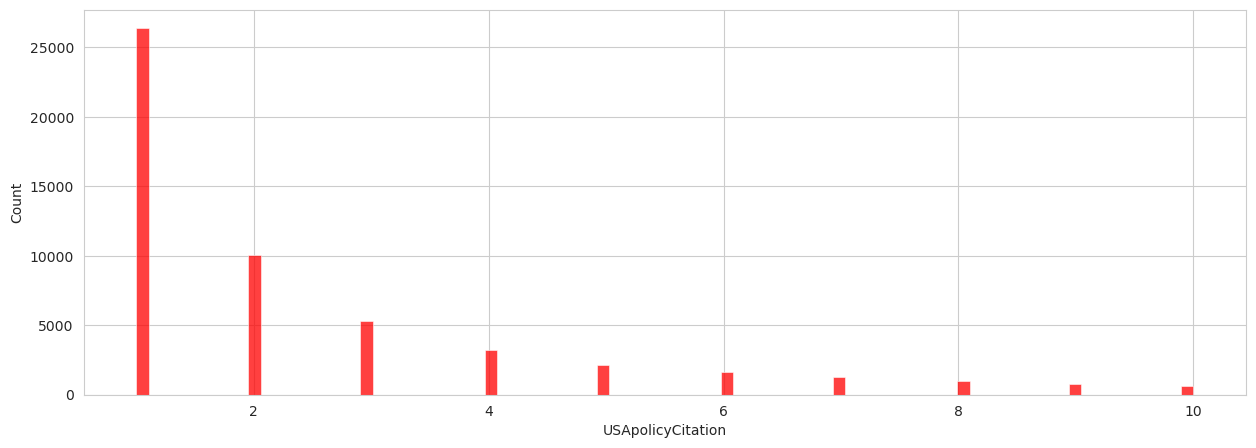

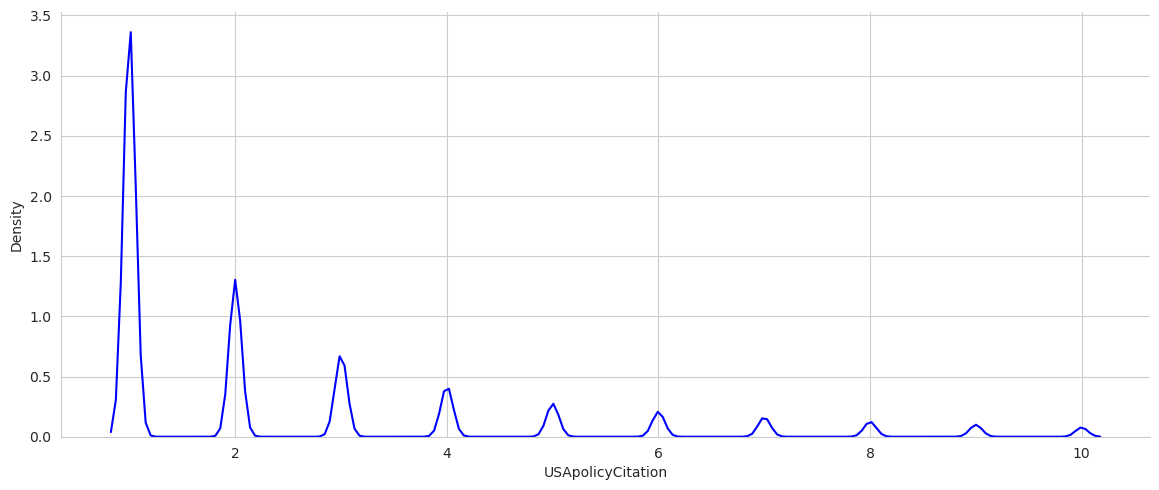

In [21]:
sns.set_style(style="whitegrid")

#%matplotlib inline
#sns.set_theme(style="darkgrid")
#sns.set_palette("red")

sns.histplot(artilcePolicyList1['USApolicyCitation'], color='red')
plt.gcf().set_size_inches(15, 5)
sns.displot(artilcePolicyList1['USApolicyCitation'], kind="kde", bw_adjust=.25, color='blue')
plt.gcf().set_size_inches(13, 5)

In [394]:
artilcePolicyList1

,url,title,policyList,policyTitles,USApolicyCitation
0,https://doi.org/10.1001/2013.jamainternmed.727,repeat testing among medicare beneficiaries,['https://effectivehealthcare.ahrq.gov/product...,['Data Points #20: Echocardiography Trends'],1
1,https://doi.org/10.1001/2013.jamapediatrics.319,response of severely obese children and adoles...,['https://asmbs.org/app/uploads/2018/08/PIIS15...,['ASMBS Pediatric Metabolic and Bariatric Surg...,1
2,https://doi.org/10.1001/amajethics.2019.603,how should unaccompanied minors in immigration...,['https://www.americanprogress.org/issues/wome...,['Immigration Detention Is Dangerous for Women...,1
3,https://doi.org/10.1001/archderm.138.12.1584,acne vulgaris,['https://www.ncbi.nlm.nih.gov/pmc/articles/PM...,['Approaches to limit systemic antibiotic use ...,1
4,https://doi.org/10.1001/archderm.138.3.370,the first international consensus on mucous me...,['https://www.ncbi.nlm.nih.gov/pmc/articles/PM...,['European guidelines (S3) on diagnosis and ma...,3
...,...,...,...,...,...
52274,https://doi.org/10.9778/cmajo.20140047,treatment of overweight and obesity in childre...,['https://www.ncbi.nlm.nih.gov/pmc/articles/PM...,"['Recommendations for growth monitoring, and p...",4
52275,https://doi.org/10.9778/cmajo.20190026,cannabis use during methadone maintenance trea...,['http://jlarc.virginia.gov/pdfs/reports/Rpt54...,['Report to the Governor and the General Assem...,3
52276,https://doi.org/10.9783/9780812208436.121,chapter 6 community college occupational degre...,['https://www.urban.org/research/publication/f...,['Federal Investments in Job Training at Commu...,1
52277,https://doi.org/10.9784/leb2(4)foster.01,a review of the biology and conservation of th...,['https://wdfw.wa.gov/sites/default/files/publ...,['APPENDIXF'],1


In [404]:
##article_policy_dict1=pd.DataFrame.from_dict(article_policy_dict, orient='index')
#artilcePolicyList1.to_csv('articlePolicyList1.csv', index = False)

In [11]:
articlePolicy= pd.read_csv('articlePolicyList1.csv', encoding="utf-8")

In [12]:
articlePolicy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52279 entries, 0 to 52278
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   url                52279 non-null  object
 1   title              52279 non-null  object
 2   policyList         52279 non-null  object
 3   policyTitles       52279 non-null  object
 4   USApolicyCitation  52279 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


In [17]:
articlePolicy.policyList =  articlePolicy.policyList.apply(literal_eval)                

In [28]:
listf=[]
for i in articlePolicy.policyList.values:
    listf = i+ listf
print(len(listf))
sl = set(listf)
print (len (sl))


124844
37620


In [ ]:
[articlePolicy.at[index, policyList] for index in range(len(articlePolicy))]

## PDFs Collection

### Downloading PDFs

In [2]:
import pandas as pd

In [3]:
articlePolicyList2 = pd.read_csv("articlePolicyList1.csv", encoding ="utf-8")

In [4]:
articlePolicyList2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52279 entries, 0 to 52278
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   url                52279 non-null  object
 1   title              52279 non-null  object
 2   policyList         52279 non-null  object
 3   policyTitles       52279 non-null  object
 4   USApolicyCitation  52279 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


In [51]:
articlePolicyList2.policyTitles = articlePolicyList2.policyTitles.apply(literal_eval)

In [52]:
articlePolicyList2.policyList = articlePolicyList2.policyList.apply(literal_eval)

In [53]:
def getUpdatedTitle(title:str)->str:
    lower_cased_title = title.lower()
    # new_title = re.sub('[^A-Za-z]', ' ', title)[0:195] #maximum possible length of file name
    #len("EXAMINING CHALLENGES THAT STATE-SANCTIONED BUSINESSES IN THE CANNABIS INDUSTRY HAVE WHEN ATTEMPTING TO ACCESS MAINSTREAM FINANCIAL SERVICES")
    new_title = lower_cased_title.translate(str.maketrans('', '', string.punctuation)).replace("’",'').replace("‘",'') # removing punctuations from the title
    return new_title
# %timeit 

### Downloading Articles

In [54]:
#map(getArticlePdf,domainArtilceList)
#random.seed(1)

async def getArticlePdf(article_index: int)->None:
    article_url = articlePolicyList2.iat[article_index,0]
    article_title = getUpdatedTitle(articlePolicyList2.iat[article_index,1])
    article_type = "doi"
    destPath = f"./articles/{article_index}_{article_title}.pdf"
    scihub_download(article_url, paper_type=article_type, out=destPath)                        
    return None
#elapsed_time
#articleResult

In [56]:
asession = AsyncHTMLSession()

In [57]:
{await getArticlePdf(index) for index in  range(len(articlePolicyList1))}

In [58]:
# articlePolicyList1.filter(like='38964', axis=0)
# articlePolicyList.at[48963,'title']

In [56]:
articlePdfList = os.listdir("/home/psych256lab/Documents/Mokarrama/Thesis/Data/articles")

In [57]:
# articlePdf_index.index(42972)#[::-1]
len(articlePdfList)

5884

In [436]:
#articlePdfList

In [60]:
articlePdf_index = defaultdict(str)

In [435]:
#articlePdf_index[]

In [61]:
def getArticlePdfList(article_pdf:str)->None:
    splitList = article_pdf.split("_")
    articlePdf_index [int(splitList[0])] = article_pdf
    return None
    

In [62]:
articlePdfList_output = [getArticlePdfList(article_pdf) for article_pdf in articlePdfList]

### Downloading Citing Policy Documents

In [15]:
async def getPolicyPdf(index: int, policy_index: int, policy: str)->None:
    policy_url = policy
    policy_title_list = articlePolicyList2.iat[index,3]
    policy_title = getUpdatedTitle(policy_title_list[policy_index])
    try:
        response = await asession.get(policy_url,timeout=60, headers={'User-Agent': 'Mozilla/5.0'}, allow_redirects=True) 
    except Exception as e:
        print("Oops!", e.__class__, "occurred while web-scrapping for policy: ", policy_url)
    else:
        response_status=response.status_code
        if  (response_status==200):
            content_type = response.headers.get('content-type')                
            if (policy_url.endswith(".pdf")) or (content_type != None and 'application/pdf' in content_type):
                   # pdf_title=f"{file.rsplit('/', 1)[-1].split('?')[0].rsplit('.',1)[0]}.pdf"
                pdf_title=f"{index}_{policy_index}_{policy_title}.pdf"
                #print(pdf_title)
                try:
                    with open(pdf_title, "wb") as new_pdf:
                        new_pdf.write(response.content) 
                except Exception as e:
                    print("Oops!", e.__class__, "occurred while writing pdf for policy: ", policy_url)
        else:
            print("not found: ", policy_url)
    finally:
        return None

In [ ]:
#asession = AsyncHTMLSession()

In [68]:
#{await getPolicyPdf(index, policy_index,policy)  for  index in  articlePdf_index for policy_index, policy in enumerate(articlePolicyList2.iat[index,2])}

In [63]:
policyPdfList = os.listdir("/home/psych256lab/Documents/Mokarrama/Thesis/Data/policies")

In [64]:
successful_policyList= defaultdict(list)

In [65]:
successful_policyPdfList = defaultdict(list)

In [458]:
# l1=[]
# l2=[2,3 ]#
# l1+=l2
# l1 #[2,3]

In [66]:
 def getPolicyList(policy:str)->None:
    policySplit = policy.split("_")
    index = int(policySplit[0])
    policy_index = int(policySplit[1])
    #policy_title = policy[2]#.split('.pdf')[0]
    successful_policyList[index] += [(articlePolicyList2.iat[index,2][policy_index])]
   # print(successful_policyList[index])
    successful_policyPdfList[index] += [policy]
  #  articlePolicyList1.at[index, 'succesful_DOI_list'].add(articlePolicyList1.iat[index,2][policy_index])
    return None
    


In [67]:
print(successful_policyList[2356])
print(successful_policyPdfList[2356])
#articlePolicyList2.iat[21,3][5]

[]
[]


In [461]:
# # for policy in policyPdfList:
# #     if '.PDF' in policy:
# #         print(policy)

# title =articlePolicyList2.at[1000, 'policyList'][1]
# print(title)
# #re.sub('[^A-za-z0-9]',' ',title)#17203_2
# getUpdatedTitle(title)


In [68]:
output = [getPolicyList(policy) for policy in policyPdfList]

In [69]:
final_articles4policy_index = sorted(successful_policyList.keys()) # number of unique articles

In [70]:
len(final_articles4policy_index)
#successful_policyPdfList[3]

2301

In [88]:
filterd_articlePolicyList = articlePolicyList2[articlePolicyList2.index.isin(final_articles4policy_index)]

In [89]:
#(filterd_articlePolicyList1.at[0,'successful_policyTitles'][])#.astype()#head()

In [90]:
filterd_articlePolicyList.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2301 entries, 3 to 52275
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   url                2301 non-null   object
 1   title              2301 non-null   object
 2   policyList         2301 non-null   object
 3   policyTitles       2301 non-null   object
 4   USApolicyCitation  2301 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 107.9+ KB


In [170]:
filterd_articlePolicyList1=filterd_articlePolicyList.copy(deep=False)

In [171]:
#filterd_articlePolicyList1.drop(columns=['successful_policyList','successful_policyTitles','articlePdf'], axis = 1, inplace = True)

In [172]:
filterd_articlePolicyList1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2301 entries, 3 to 52275
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   url                2301 non-null   object
 1   title              2301 non-null   object
 2   policyList         2301 non-null   object
 3   policyTitles       2301 non-null   object
 4   USApolicyCitation  2301 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 172.4+ KB


In [169]:
#articlePolicyList2.info()

In [173]:
#type(successful_policyList[2356])#+[]
#articlePdf_index[2356]
#successful_policyPdfList[2356]+[]
#filterd_articlePolicyList1.at[2356,'successful_policyList'] =[]#+= successful_policyList[2356]

In [174]:
filterd_articlePolicyList1.insert(len(filterd_articlePolicyList1.columns), 'successful_policyList', '[]')
filterd_articlePolicyList1.insert(len(filterd_articlePolicyList1.columns), 'successful_policyTitles', '[]')
filterd_articlePolicyList1.insert(len(filterd_articlePolicyList1.columns), 'articlePdf', '')

In [175]:
filterd_articlePolicyList1.successful_policyList = filterd_articlePolicyList1.successful_policyList.apply(literal_eval)
filterd_articlePolicyList1.successful_policyTitles = filterd_articlePolicyList1.successful_policyTitles.apply(literal_eval)

In [180]:
#type(filterd_articlePolicyList1.at[2356,'articlePdf'])

In [181]:
#successful_policyList

In [114]:
#filterd_articlePolicyList1.head()

In [182]:
def update_filterd_articlePolicyList(index:int)->None:
    filterd_articlePolicyList1.at[index,'successful_policyList'] += successful_policyList[index]
    filterd_articlePolicyList1.at[index,'successful_policyTitles'] += successful_policyPdfList[index]
    filterd_articlePolicyList1.at[index,'articlePdf'] = articlePdf_index[index]
    return None

In [139]:
#filterd_articlePolicyList1.head(2)

In [140]:
#final_articles4policy_index

In [183]:
filtered_output = [update_filterd_articlePolicyList(index) for index in final_articles4policy_index]
#filterd_articlePolicyList1.loc[0,:]

In [188]:
#filterd_articlePolicyList1.head()


In [189]:
filterd_articlePolicyList1['total_successful_policy'] = filterd_articlePolicyList1["successful_policyList"].apply(len)

In [190]:
filterd_articlePolicyList1['successfulPolicyPercentage'] = round((filterd_articlePolicyList1["total_successful_policy"]/filterd_articlePolicyList1["USApolicyCitation"])*100, 2)

In [191]:
filterd_articlePolicyList1['successfulPolicyPercentage'].sum()/len(filterd_articlePolicyList1)

82.7732246849196

In [192]:
filterd_articlePolicyList.head(2)

,url,title,policyList,policyTitles,USApolicyCitation
3,https://doi.org/10.1001/archderm.138.12.1584,acne vulgaris,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,[Approaches to limit systemic antibiotic use i...,1
5,https://doi.org/10.1001/archderm.139.3.318,the frequency of common skin conditions in pre...,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,[Topical antifungals for seborrhoeic dermatiti...,3


In [193]:
filterd_articlePolicyList2=filterd_articlePolicyList1.copy(deep=False)
#filterd_articlePolicyList2.reset_index(drop=True, inplace=True)

In [194]:
filterd_articlePolicyList2.set_index('url', inplace =True)

In [196]:
#filterd_articlePolicyList2.index

In [197]:
# filterd_articlePolicyList1.drop(['successful_PolicyList'], axis=1 , inplace = True)
# filterd_articlePolicyList1.drop(['successful_policyTitles'], axis=1 , inplace = True)

In [ ]:
filterd_articlePolicyList2.info()
#filterd_articlePolicyList.at[21,'successful_PolicyList']

In [200]:
#filterd_articlePolicyList2.to_csv("filterd_articlePolicyList.csv", encoding='utf-8')

## PDFs Processing

In [17]:
import csv 
import pandas as pd

In [18]:
filterd_articlePolicyList2 = pd.read_csv('filterd_articlePolicyList.csv', encoding='utf-8')

In [19]:
filterd_articlePolicyList2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2301 entries, 0 to 2300
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         2301 non-null   object 
 1   title                       2301 non-null   object 
 2   policyList                  2301 non-null   object 
 3   policyTitles                2301 non-null   object 
 4   USApolicyCitation           2301 non-null   int64  
 5   successful_policyList       2301 non-null   object 
 6   successful_policyTitles     2301 non-null   object 
 7   articlePdf                  2301 non-null   object 
 8   total_successful_policy     2301 non-null   int64  
 9   successfulPolicyPercentage  2301 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 179.9+ KB


In [7]:
filterd_articlePolicyList2.head()

,url,title,policyList,policyTitles,USApolicyCitation,successful_policyList,successful_policyTitles,articlePdf,total_successful_policy,successfulPolicyPercentage
0,https://doi.org/10.1001/archderm.138.12.1584,acne vulgaris,['https://www.ncbi.nlm.nih.gov/pmc/articles/PM...,['Approaches to limit systemic antibiotic use ...,1,['https://www.ncbi.nlm.nih.gov/pmc/articles/PM...,['3_0_approaches to limit systemic antibiotic ...,3_acne vulgaris.pdf,1,100.00
1,https://doi.org/10.1001/archderm.139.3.318,the frequency of common skin conditions in pre...,['https://www.ncbi.nlm.nih.gov/pmc/articles/PM...,['Topical antifungals for seborrhoeic dermatit...,3,['https://www.ncbi.nlm.nih.gov/pmc/articles/PM...,['5_1_interventions for infantile seborrhoeic ...,5_the frequency of common skin conditions in p...,3,100.00
2,https://doi.org/10.1001/archgenpsychiatry.2009...,brief personalitytargeted coping skills interv...,['https://purl.fdlp.gov/GPO/gpo75951'],['Facing addiction in America :\xa0the Surgeon...,1,['https://purl.fdlp.gov/GPO/gpo75951'],['16_0_facing addiction in america \xa0the sur...,16_brief personalitytargeted coping skills int...,1,100.00
3,https://doi.org/10.1001/archgenpsychiatry.2009...,childhood adversities and adult psychiatric di...,['https://www.aclu.org/legal-document/rilr-v-j...,['RILR v. Johnson - Amended Motion for Prelimi...,6,['https://hhs.texas.gov/sites/default/files/do...,['17_3_the mommies toolkit improving outcomes ...,17_childhood adversities and adult psychiatric...,4,66.67
4,https://doi.org/10.1001/archgenpsychiatry.2010...,antidepressant monotherapy vs sequential pharm...,['https://www.ncbi.nlm.nih.gov/pmc/articles/PM...,['Approaches for discontinuation versus contin...,5,['https://www.ncbi.nlm.nih.gov/pmc/articles/PM...,['20_1_canadian network for mood and anxiety t...,20_antidepressant monotherapy vs sequential ph...,4,80.00


In [9]:
from ast import literal_eval
filterd_articlePolicyList2.policyList = filterd_articlePolicyList2.policyList.apply(literal_eval)
filterd_articlePolicyList2.policyTitles = filterd_articlePolicyList2.policyTitles.apply(literal_eval)
filterd_articlePolicyList2.successful_policyList = filterd_articlePolicyList2.successful_policyList.apply(literal_eval)
filterd_articlePolicyList2.successful_policyTitles = filterd_articlePolicyList2.successful_policyTitles.apply(literal_eval)

In [10]:
listf=[]
for i in filterd_articlePolicyList2.successful_policyList.values:
    listf = i+ listf
print(len(listf))
sl = set(listf)
print (len (sl))


4486
2818


In [59]:
2818/4394

0.6413290851160673

In [60]:
filterd_articlePolicyList2['successfulPolicyPercentage'].sum()/len(filterd_articlePolicyList2)

82.7732246849196

In [61]:
len(filterd_articlePolicyList2)

2301

In [51]:
# filterd_articlePolicyList2[['total_successful_policy','successfulPolicyPercentage']]
# x = filterd_articlePolicyList2[filterd_articlePolicyList2['successfulPolicyPercentage']>=50]

In [12]:
filterd_articlePolicyList2.set_index('url', inplace =True)

In [13]:
#filterd_articlePolicyList2.index

In [14]:
filterd_articlePolicyList2.at['https://doi.org/10.1001/archderm.139.3.318','articlePdf']

'5_the frequency of common skin conditions in preschoolaged children in australia.pdf'

In [35]:
# filterd_articlePolicyList2.policyTitles = filterd_articlePolicyList2.policyTitles.apply(literal_eval)
# filterd_articlePolicyList2.policyList =  filterd_articlePolicyList2.policyList.apply(literal_eval)                
# filterd_articlePolicyList2.successful_policyList = filterd_articlePolicyList2.successful_policyList.apply(literal_eval)
# filterd_articlePolicyList2.successful_policyTitles = filterd_articlePolicyList2.successful_policyTitles.apply(literal_eval)
# #filterd_articlePolicyList2.articlePdf = filterd_articlePolicyList2.articlePdf.apply(literal_eval)

In [16]:
#filterd_articlePolicyList2.sentence_t5_xl_sim = filterd_articlePolicyList2.sentence_t5_xl_sim.apply(literal_eval)
#filterd_articlePolicyList2.scibert_sim =  filterd_articlePolicyList2.scibert_simscibert_simscibert_simscibert_sim.apply(literal_eval)                
#filterd_articlePolicyList2.biobert_large_cased_v11_squad_sim = filterd_articlePolicyList2.biobert_large_cased_v11_squad_sim.apply(literal_eval)
# filterd_articlePolicyList2.all_mpnet_base_v2_sim = filterd_articlePolicyList2.all_mpnet_base_v2_sim.apply(literal_eval)
# filterd_articlePolicyList2.all_MiniLM_L6_v2_sim = filterd_articlePolicyList2.all_MiniLM_L6_v2_sim.apply(literal_eval)
# #filterd_articlePolicyList2.articlePdf = filterd_articlePolicyList2.articlePdf.apply(literal_eval)
# filterd_articlePolicyList2.final_policy_urls = filterd_articlePolicyList2.final_policy_urls.apply(literal_eval)
# filterd_articlePolicyList2.final_policy_pdfs =  filterd_articlePolicyList2.final_policy_pdfs.apply(literal_eval)                

In [ ]:
filterd_articlePolicyList2.columns

In [19]:
# filterd_articlePolicyList2.insert(len(filterd_articlePolicyList2.columns), 'final_policy_urls', '[]')
# filterd_articlePolicyList2['final_policy_urls'] = filterd_articlePolicyList2['final_policy_urls'].apply(literal_eval)
# filterd_articlePolicyList2.insert(len(filterd_articlePolicyList2.columns), 'final_policy_pdfs', '[]')
# filterd_articlePolicyList2['final_policy_pdfs'] = filterd_articlePolicyList2['final_policy_pdfs'].apply(literal_eval)

In [21]:
# for model in list(model_name.keys()):
#     filterd_articlePolicyList2.drop(columns=[f"{model}_sim"], axis = 1, inplace = True)

#filterd_articlePolicyList2.drop(columns=['political_bert_sim'], axis = 1, inplace = True)

In [22]:
# filterd_articlePolicyList2.info()

In [23]:
# !pip install --upgrade git+https://github.com/Muennighoff/sentence-transformers.git@sgpt_poolings_specb
#!pip3 install git+https://github.com/UKPLab/sentence-transformers.git

In [35]:
#model_dict

## Getting cleaned list of sentences for each document (Article/Policy)

In [13]:
def text_preprocessing(text: str)->list:
    """Cleaning the pdf texts.
    """
    preprocess_functions = [ remove_email, remove_url, remove_number, remove_special_character, remove_itemized_bullet_and_numbering, normalize_unicode, remove_whitespace]
    preprocessed_text = preprocess_text(text, preprocess_functions)
    preprocessed_text1=preprocess_text(preprocessed_text, [remove_name]) 
    
    sentence_list = nltk.sent_tokenize(preprocessed_text1)
    cleaned_sentence_list=[sentence.translate(str.maketrans('','',string.punctuation)).strip() for sentence in sentence_list] # remove punctuations and leading or trailing zeros from each sentence in the list
    
    return cleaned_sentence_list 

In [14]:
# xx='sgdg"hgshs [sdjdn gfkgu khjk \n. mjmokarrama@gmail.com z1926043@students.niu.edu]. https://www.w3schools.com/python/ref_string_translate.asp world'
# text_preprocessing(xx)

In [15]:
#Extract text from Pdf using pyMuPDF
def extract_pdf_text(file_path: str)-> str:
    text = " "
    try:
        with fitz.open(file_path) as doc: # open a supported document
            text = ' '.join([page.get_text() for page in doc])
    except Exception as e:
        text = "Failed to open file"
        return text
    else:
        return text

In [16]:
# def getProcessedPdf(file_path:str):
# #     if file_type=="article":
# #         file_path = find_file(pdf_title,)
# #     else:
# #         file_path = find_file(pdf_title,'policy')
# #     if(len(file_path))!=0:
#             pdf_text = extract_pdf_text(file_path) #         extract text 
#             cleaned_text = text_preprocessing(pdf_text)  #         do preprocessing
#             cleaned_text1 = [sentence for sentence in cleaned_text if sentence!=''] 
#     return cleaned_text1

In [17]:
def find_file(file_title: str,file_type: str)->str:
    flag=0
    file_path=""
    folder="articles"
    path="/home/psych256lab/Documents/Mokarrama/Thesis/Data/" 
    if file_type=="policy":
        folder="policies"
    file_path=path+folder+"/"+file_title
        
    return file_path

In [32]:
def pdfProcessing(index: str, policy_index:int, policy_url: str, file_type: str)->None:
    if file_type=='article': 
        pdf_title = filterd_articlePolicyList2.at[index,'articlePdf']
    else:
        pdf_title = filterd_articlePolicyList2.at[index,'successful_policyTitles'][policy_index]

    file_path = find_file(pdf_title,file_type)  # get file path
    pdf_text = extract_pdf_text(file_path)      # extract text 
              
    if (pdf_text!="Failed to open file"):
        sentence_list = text_preprocessing(pdf_text)  #  do preprocessing
        non_empty_sentence_list = [sentence for sentence in sentence_list if sentence!=''] 
        if file_type=='article':
            article_sentences[index] = non_empty_sentence_list 
        else:
            policy_sentences[policy_url] = non_empty_sentence_list 

    return None


In [33]:
#for index in df:
def documentProcessing(index:str):
    # For Articles
    pdfProcessing(index, -1, '', file_type = 'article')
    # For Policy 
    policy_urls= filterd_articlePolicyList2.at[index,'successful_policyList']
    [pdfProcessing(index, policy_index, policy_url, file_type = 'policy') for policy_index, policy_url in enumerate(policy_urls)]
              
    return None

In [28]:
article_list = list(filterd_articlePolicyList2.index)

In [35]:
docProcess = [documentProcessing(article) for article in article_list] # if article_list.index(article)>1701]

In [26]:
# # #Store sentences & embeddings on disc
# with open('article_sentences.pkl', "wb") as fOut:
#      pickle.dump(article_sentences, fOut, protocol=pickle.HIGHEST_PROTOCOL)

# # #Store sentences & embeddings on disc
# with open('policy_sentences.pkl', "wb") as fOut:
#      pickle.dump(policy_sentences, fOut, protocol=pickle.HIGHEST_PRO

In [28]:
#article_sentences['https://doi.org/10.9778/cmajo.20190026'] 

In [31]:
faulty_policy_documents = defaultdict(list)

In [27]:
# with open('faulty_policy_documents.pkl', "rb") as fIn:
    # faulty_policy_documents = pickle.load(fIn)

In [40]:
# len(faulty_policy_documents)

## Embedding Documents  

In [ ]:
article_sentences = defaultdict()
policy_sentences = defaultdict()

In [30]:
# #Load sentences & embeddings from disc
with open('article_sentences.pkl', "rb") as fIn:
    article_sentences = pickle.load(fIn)
#filterd_articlePolicyList2.info()
   

In [29]:
# #Load sentences & embeddings from disc
with open('policy_sentences.pkl', "rb") as fIn:
    policy_sentences = pickle.load(fIn)

In [18]:
# def free_gpu_cache():
#     print("Initial GPU Usage")
#     gpu_usage()                             

#     torch.cuda.empty_cache()

#     cuda.select_device(0)
#     cuda.close()
#     cuda.select_device(0)

#     print("GPU Usage after emptying the cache")
#     gpu_usage()

# free_gpu_cache()   

print(gpu_usage())
gc.collect()
with torch.no_grad():
    torch.cuda.empty_cache()
#torch.cuda.empty_cache()
gpu_usage()

| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |
None
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |


In [19]:
#import torch
use_cuda = torch.cuda.is_available()
if use_cuda:
    print('__Memory Allocated (Device):',torch.cuda.memory_allocated())
    print('__Max Memory Allocated:',torch.cuda.max_memory_allocated()/1e6)
    print('__Memory Reserved:',torch.cuda.memory_reserved()/1e9)
    print('__Currently used device:', torch.cuda.current_device())
    print('__CUDNN VERSION:', torch.backends.cudnn.version())
    print('__Number CUDA Devices:', torch.cuda.device_count())
    print('__CUDA Device Name:',torch.cuda.get_device_name(0))
    print('__CUDA Device Total Memory [GB]:',torch.cuda.get_device_properties(0))#.total_memory/1e6)

__Memory Allocated (Device): 0
__Max Memory Allocated: 0.0
__Memory Reserved: 0.0
__Currently used device: 0
__CUDNN VERSION: 8500
__Number CUDA Devices: 1
__CUDA Device Name: NVIDIA GeForce RTX 2080 SUPER
__CUDA Device Total Memory [GB]: _CudaDeviceProperties(name='NVIDIA GeForce RTX 2080 SUPER', major=7, minor=5, total_memory=7969MB, multi_processor_count=48)


In [21]:
model_name['political_bert'] = "kornosk/bert-political-election2020-twitter-mlm"
model_name['legal_bert'] = 'nlpaueb/legal-bert-base-uncased'
model_name['specter'] = 'allenai-specter'
model_name['scibert'] = 'allenai/scibert_scivocab_uncased'
model_name['clinical_bert'] = 'emilyalsentzer/Bio_ClinicalBERT'
# model_name['SGPT_msmarco_specb_bitfit'] = 'Muennighoff/SGPT-125M-weightedmean-msmarco-specb-bitfit'
# model_name['SGPT_nli_bitfit'] = 'Muennighoff/SGPT-5.8B-weightedmean-nli-bitfit'
model_name['sentence_t5_base'] = 'sentence-t5-base'
model_name['sentence_t5_xl'] = 'sentence-t5-xl'
model_name['bert_large_uncased'] = 'bert-large-uncased'
model_name['bert_base_uncased'] = 'bert-base-uncased'
model_name['all_distilroberta_v1'] = 'all-distilroberta-v1'
model_name['all_mpnet_base_v2'] = 'all-mpnet-base-v2'
model_name['all_MiniLM_L6_v2'] = 'all-MiniLM-L6-v2'
model_name['biobert_large_cased_v11_squad'] = 'dmis-lab/biobert-large-cased-v1.1-squad'

model_name['biobert_large_cased'] = 'dmis-lab/biobert-large-cased-v1.1'
model_name['biobert_v11'] = 'dmis-lab/biobert-v1.1'
model_name['biobert_base_cased_v12'] = 'dmis-lab/biobert-base-cased-v1.2'
model_name['biobert_base_cased_v11'] = 'dmis-lab/biobert-base-cased-v1.1'

In [ ]:
filterd_articlePolicyList2.insert(len(filterd_articlePolicyList2.columns), 'final_policy_urls', '[]')
filterd_articlePolicyList2['final_policy_urls'] = filterd_articlePolicyList2['final_policy_urls'].apply(literal_eval)
filterd_articlePolicyList2.insert(len(filterd_articlePolicyList2.columns), 'final_policy_pdfs', '[]')
filterd_articlePolicyList2['final_policy_pdfs'] = filterd_articlePolicyList2['final_policy_pdfs'].apply(literal_eval)

In [23]:
#np.ndarray
filterd_articlePolicyList2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2301 entries, https://doi.org/10.1001/archderm.138.12.1584 to https://doi.org/10.9778/cmajo.20190026
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       2301 non-null   object 
 1   policyList                  2301 non-null   object 
 2   policyTitles                2301 non-null   object 
 3   USApolicyCitation           2301 non-null   int64  
 4   successful_policyList       2301 non-null   object 
 5   successful_policyTitles     2301 non-null   object 
 6   articlePdf                  2301 non-null   object 
 7   total_successful_policy     2301 non-null   int64  
 8   successfulPolicyPercentage  2301 non-null   float64
 9   sentence_t5_xl_sim          2301 non-null   object 
 10  final_policy_urls           2301 non-null   object 
 11  final_policy_pdfs           2301 non-null   object 
dtypes: float64(1), int

In [ ]:
for model in list(model_name.keys()):
    new_similarity_column = f"{model}_sim"
    filterd_articlePolicyList2.insert(len(filterd_articlePolicyList2.columns), new_similarity_column, '[]')
    filterd_articlePolicyList2[new_similarity_column] = filterd_articlePolicyList2[new_similarity_column].apply(literal_eval)

In [24]:
#model_dict ={}

In [24]:
#load_models
for model in list(model_name.keys()):
    model_dict[model] = SentenceTransformer(model_name[model], device = 'cuda:0')#, device='cpu')

In [26]:
gpu_usage()

| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |


In [32]:
def calculateArticlePolicySimilarity(index: str, article_embedding: defaultdict, policy_embedding: defaultdict)->None:
    
    # article_embeddings = article_embedding['embeddings']
    # policy_embeddings = policy_embedding['embeddings']
    
   # similarity_dict = {} # similarity_dict.clear()
    
    for model in list(model_name.keys()):

        filterd_articlePolicyList2.at[index,f"{model}_sim"] += [float("{:0.3f}".format(torch.mean(util.cos_sim(article_embedding[model], policy_embedding[model])).item()))]
      # similarity_dict[f"{model}_sim"] =    
    #for each article: 5 embeddings:-> n policy: for each policy 5 embeddings: total 5n embeddings
    
    return None #similarity_dict #{"political_bert_sim":political_bert_sim, "legal_bert_sim":legal_bert_sim, "specter_sim":specter_sim, "clinical_bert_sim":clinical_bert_sim,"SGPT_sim":SGPT_sim, "sentence_t5_base_sim":sentence_t5_base_sim, "sentence_t5_xl_sim":sentence_t5_xl_sim, "bert_large_uncased_sim":bert_large_uncased_sim, "bert_base_uncased_sim":bert_base_uncased_sim, "biobert_large_cased_v11_squad_sim":biobert_large_cased_v11_squad_sim, "biobert_large_cased_v11":biobert_large_cased_v11, "biobert_v11":biobert_v11, "biobert_base_cased_v12":biobert_base_cased_v12, "biobert_base_cased_v11":biobert_base_cased_v11}


In [33]:
def getDocumentEmbedding(input_sentence_list:list)->defaultdict:
    
        embedding_dict = {}
        
        for model in list(model_name.keys()):
            #Compute embedding
            embedding_dict[f"{model}"] = model_dict[model].encode(input_sentence_list, batch_size = 16, convert_to_tensor=True, device ='cuda:0')
      #     embedding5 = model5.encode(cleaned_text, convert_to_tensor=True)
        return embedding_dict #{"sgpt":embedding1, "mnli": embedding2, "specter": embedding3,"model4":embedding4,"model5": embedding5}

In [34]:
def calculateEmbedding(index: str, policy_index: int, policy_url: str, file_type: str)-> defaultdict:
    embeddings = {}
    url = index
    type_sentences = article_sentences
    if file_type=='policy':
        url = policy_url
        policy_pdf_title = filterd_articlePolicyList2.at[index,'successful_policyTitles'][policy_index]
        type_sentences = policy_sentences
    if (url in type_sentences):
        sentence_list = type_sentences[url]
        non_empty_sentence_list = [sentence for sentence in sentence_list if sentence!=''] 
        if (len(non_empty_sentence_list)!=0):
            embeddings = getDocumentEmbedding(non_empty_sentence_list) # returns dictionary of embedding for different model
            
            if file_type == 'policy':
                filterd_articlePolicyList2.at[index,'final_policy_urls'] += [policy_url]
                filterd_articlePolicyList2.at[index,'final_policy_pdfs'] += [policy_pdf_title]
        else: 
            if file_type == 'policy':
                faulty_policy_documents[index] += [policy_url]
    else:
        if file_type == 'policy':
            faulty_policy_documents[index] += [policy_url]
    return embeddings

In [35]:
# article_sentences['https://doi.org/10.9778/cmajo.20190026'] 

In [36]:
#filterd_articlePolicyList2.at['https://doi.org/10.1001/archderm.138.12.1584',]#


In [37]:
# for x in article_sentences:
#     print(x)
#     break

In [38]:
#for index in df:
def documentEmbedding(index:str):
    # For Articles
    article_embedding = {}
    policy_embedding = {}
    article_url = index #filterd_articlePolicyList2.at[index,'url']
    article_embedding = calculateEmbedding(index, policy_index = -1, policy_url='', file_type = 'article')
    if (article_embedding):
        policy_urls= filterd_articlePolicyList2.at[index,'successful_policyList']
        policy_embedding_list = [calculateEmbedding(index, policy_index, policy_url, file_type = 'policy') for policy_index, policy_url in enumerate(policy_urls)]
                        # List of embedding dictionaries
        output = [calculateArticlePolicySimilarity(index, article_embedding,policy_embedding)  for policy_embedding in policy_embedding_list if len(policy_embedding_list)!=0 and bool(policy_embedding)]      
    #         filterd_articlePolicyList2.at[index,'final_policy_pdfs'] += [policy_pdf_title]           

    return None

In [34]:
#[documentProcessing(article) for article in article_list]
# for em in article_embedding:
#     print(article_embedding[em])
#     break

In [39]:
out = [documentEmbedding(article) for article in article_list] # if article_list.index(article)>1701]

In [40]:
#!pip3 install GPUtil

from GPUtil import showUtilization as gpu_usage
gpu_usage()                             

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
| ID | GPU | MEM |
------------------
|  0 |  0% | 91% |


In [ ]:
filterd_articlePolicyList2#.head()#.columns

In [918]:
#filterd_articlePolicyList2.to_csv('filterd_articlePolicyList.csv', encoding ='utf-8', index=False)

### Dataset Merging 

In [483]:
import glob
from functools import reduce

In [484]:
path = '/home/psych256lab/Documents/Mokarrama/Thesis/Final files'
csv_files = glob.glob(os.path.join(path, "*.csv"))
#csv_files

In [485]:
df = pd.read_csv(path+'/new/filterd_articlePolicyList.csv', encoding = 'utf-8')
merge_columns = list(df.columns)

In [486]:
def readFile(file:str)->pd.core.frame.DataFrame:
    #file_name = f"df{index}"
    file_name = pd.read_csv(file, encoding = 'utf-8')
    #file_name.set_index('url', inplace =True)
    file_name.drop(columns = ['final_policy_urls', 'final_policy_pdfs'], axis=1, inplace =True)
    return file_name
   
#df.drop(columns = ['final_policy_urls', 'final_policy_pdfs'], axis=1), 

In [487]:
#pd.concat([pd.read_csv(f, encoding = 'utf-8').set_index('url') for f in csv_files], axis=0).to_csv('merged.csv', index=False)

In [488]:
updated_df_list = [readFile(file) for file in csv_files[1:]]
#outputs

In [489]:
df_merged =  reduce(lambda  left,right: pd.merge(left,right,on=merge_columns,
                                            how='inner'), updated_df_list)

In [490]:
tfdf = pd.read_csv(path+'/new/tfidfScores.csv', usecols =['url','tfidf_sim'], encoding = 'utf-8')
#merge_columns = list(df1.columns)

In [491]:
df1 = pd.read_csv(csv_files[0], encoding = 'utf-8')
#df1.columns

In [561]:
final_csv_file = pd.merge(pd.merge(df_merged,df1, on = merge_columns), tfdf, on ='url')#


In [562]:
final_csv_file.info()#.column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2301 entries, 0 to 2300
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   url                                2301 non-null   object 
 1   title                              2301 non-null   object 
 2   policyList                         2301 non-null   object 
 3   policyTitles                       2301 non-null   object 
 4   USApolicyCitation                  2301 non-null   int64  
 5   successful_policyList              2301 non-null   object 
 6   successful_policyTitles            2301 non-null   object 
 7   articlePdf                         2301 non-null   object 
 8   total_successful_policy            2301 non-null   int64  
 9   successfulPolicyPercentage         2301 non-null   float64
 10  legal_bert_sim                     2301 non-null   object 
 11  scibert_sim                        2301 non-null   objec

In [563]:
final_csv_file = final_csv_file.drop(final_csv_file.filter(regex="Unname"),axis=1)

In [20]:
article_embedding = defaultdict()
policy_embedding = defaultdict()
model_name = defaultdict(str)
similarity_dict = defaultdict(float)
embedding_dict = defaultdict()
model_dict = defaultdict()

In [564]:
cols=final_csv_file.columns.tolist()

In [565]:
reordered_cols = cols[0:2]+[cols[7]]+[cols[4]]+cols[2:4]+cols[5:7]+cols[8:10]+cols[-3:]+[cols[18]]+[cols[23]]+cols[19:22]+[cols[17]]+[cols[22]]+cols[24:27]+cols[10:17]

In [566]:
final_csv_file1 = final_csv_file[reordered_cols]

In [567]:
final_csv_file1.set_index('url', inplace = True)

In [568]:
#final_csv_file1.to_csv('finalMergedFile.csv', encoding='utf-8', index= False)
#final_csv_file1 = pd.read_csv('finalMergedFile.csv', encoding='utf-8')

In [570]:
final_csv_file1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2301 entries, https://doi.org/10.1001/archderm.138.12.1584 to https://doi.org/10.9778/cmajo.20190026
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   title                              2301 non-null   object 
 1   articlePdf                         2301 non-null   object 
 2   USApolicyCitation                  2301 non-null   int64  
 3   policyList                         2301 non-null   object 
 4   policyTitles                       2301 non-null   object 
 5   successful_policyList              2301 non-null   object 
 6   successful_policyTitles            2301 non-null   object 
 7   total_successful_policy            2301 non-null   int64  
 8   successfulPolicyPercentage         2301 non-null   float64
 9   final_policy_urls                  2301 non-null   object 
 10  final_policy_pdfs                  2301 non-null

In [571]:
final_csv_file2 = final_csv_file1.copy(deep=False)

In [572]:
update_col_list = reordered_cols[4:8]+reordered_cols[10:]
#update_col_list

In [546]:
#final_csv_file2.iat[0, 22]

In [573]:
def updateListColumns(col):
    final_csv_file2[col] = final_csv_file2[col].apply(literal_eval)
    return None

In [574]:
updatedCols = [updateListColumns(col) for col in update_col_list]

In [575]:
def avgSimCalculation(cellValue:list)->float:
    newValue = float("{:0.3f}".format(np.mean(cellValue)))
    return newValue


In [577]:
meanSim = [mapColumnsforSim(col) for col in final_csv_file2.columns.tolist()[11:]]

In [578]:
final_csv_file2.columns

Index(['title', 'articlePdf', 'USApolicyCitation', 'policyList',
       'policyTitles', 'successful_policyList', 'successful_policyTitles',
       'total_successful_policy', 'successfulPolicyPercentage',
       'final_policy_urls', 'final_policy_pdfs', 'tfidf_sim',
       'bert_base_uncased_sim', 'bert_large_uncased_sim',
       'all_distilroberta_v1_sim', 'all_mpnet_base_v2_sim',
       'all_MiniLM_L6_v2_sim', 'sentence_t5_base_sim', 'sentence_t5_xl_sim',
       'political_bert_sim', 'specter_sim', 'clinical_bert_sim',
       'legal_bert_sim', 'scibert_sim', 'biobert_large_cased_v11_squad_sim',
       'biobert_large_cased_sim', 'biobert_v11_sim',
       'biobert_base_cased_v12_sim', 'biobert_base_cased_v11_sim',
       'mean_tfidf_sim', 'mean_bert_base_uncased_sim',
       'mean_bert_large_uncased_sim', 'mean_all_distilroberta_v1_sim',
       'mean_all_mpnet_base_v2_sim', 'mean_all_MiniLM_L6_v2_sim',
       'mean_sentence_t5_base_sim', 'mean_sentence_t5_xl_sim',
       'mean_political

In [580]:
final_csv_file2[['tfidf_sim','mean_tfidf_sim']]

,tfidf_sim,mean_tfidf_sim
url,,
https://doi.org/10.1001/archderm.138.12.1584,[0.384],0.384
https://doi.org/10.1001/archderm.139.3.318,"[0.172, 0.307, 0.2]",0.226
https://doi.org/10.1001/archgenpsychiatry.2009.173,[0.508],0.508
https://doi.org/10.1001/archgenpsychiatry.2009.186,"[0.305, 0.141, 0.141, 0.239]",0.206
https://doi.org/10.1001/archgenpsychiatry.2010.168,"[0.53, 0.488, 0.478, 0.25]",0.436
...,...,...
https://doi.org/10.9745/ghsp-d-18-00275,[0.49],0.490
https://doi.org/10.9745/ghsp-d-19-00195,[0.254],0.254
https://doi.org/10.9758/cpn.2013.11.3.107,[0.257],0.257


In [581]:
final_csv_file2

,title,articlePdf,USApolicyCitation,policyList,policyTitles,successful_policyList,successful_policyTitles,total_successful_policy,successfulPolicyPercentage,final_policy_urls,...,mean_political_bert_sim,mean_specter_sim,mean_clinical_bert_sim,mean_legal_bert_sim,mean_scibert_sim,mean_biobert_large_cased_v11_squad_sim,mean_biobert_large_cased_sim,mean_biobert_v11_sim,mean_biobert_base_cased_v12_sim,mean_biobert_base_cased_v11_sim
url,,,,,,,,,,,,,,,,,,,,,
https://doi.org/10.1001/archderm.138.12.1584,acne vulgaris,3_acne vulgaris.pdf,1,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,[Approaches to limit systemic antibiotic use i...,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,[3_0_approaches to limit systemic antibiotic u...,1,100.00,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,...,0.579,0.649,0.782,0.659,0.580,0.913,0.791,0.723,0.772,0.763
https://doi.org/10.1001/archderm.139.3.318,the frequency of common skin conditions in pre...,5_the frequency of common skin conditions in p...,3,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,[Topical antifungals for seborrhoeic dermatiti...,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,[5_1_interventions for infantile seborrhoeic d...,3,100.00,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,...,0.565,0.670,0.769,0.683,0.587,0.901,0.788,0.725,0.762,0.745
https://doi.org/10.1001/archgenpsychiatry.2009.173,brief personalitytargeted coping skills interv...,16_brief personalitytargeted coping skills int...,1,[https://purl.fdlp.gov/GPO/gpo75951],[Facing addiction in America : the Surgeon Gen...,[https://purl.fdlp.gov/GPO/gpo75951],[16_0_facing addiction in america the surgeon...,1,100.00,[https://purl.fdlp.gov/GPO/gpo75951],...,0.557,0.687,0.776,0.685,0.599,0.913,0.789,0.733,0.767,0.755
https://doi.org/10.1001/archgenpsychiatry.2009.186,childhood adversities and adult psychiatric di...,17_childhood adversities and adult psychiatric...,6,[https://www.aclu.org/legal-document/rilr-v-jo...,[RILR v. Johnson - Amended Motion for Prelimin...,[https://hhs.texas.gov/sites/default/files/doc...,[17_3_the mommies toolkit improving outcomes f...,4,66.67,[https://hhs.texas.gov/sites/default/files/doc...,...,0.537,0.676,0.753,0.681,0.602,0.903,0.792,0.716,0.752,0.742
https://doi.org/10.1001/archgenpsychiatry.2010.168,antidepressant monotherapy vs sequential pharm...,20_antidepressant monotherapy vs sequential ph...,5,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,[Approaches for discontinuation versus continu...,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,[20_1_canadian network for mood and anxiety tr...,4,80.00,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,...,0.594,0.708,0.794,0.718,0.583,0.919,0.817,0.744,0.788,0.776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://doi.org/10.9745/ghsp-d-18-00275,mlearning in the democratic republic of the co...,52264_mlearning in the democratic republic of ...,1,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,[Health workers’ perceptions and experiences o...,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,[52264_0_health workers perceptions and experi...,1,100.00,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,...,0.599,0.689,0.797,0.709,0.612,0.921,0.839,0.751,0.797,0.776
https://doi.org/10.9745/ghsp-d-19-00195,effectiveness of an electronic partogram a mix...,52266_effectiveness of an electronic partogram...,1,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,[The injustice of unfit clinical practice guid...,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,[52266_0_the injustice of unfit clinical pract...,1,100.00,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,...,0.640,0.665,0.816,0.748,0.638,0.928,0.854,0.784,0.822,0.801
https://doi.org/10.9758/cpn.2013.11.3.107,the neuroimmunology of schizophrenia,52270_the neuroimmunology of schizophrenia.pdf,1,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,[Acetylsalicylic acid (aspirin) for schizophre...,[https://www.ncbi.nlm.nih.gov/pmc/arti

In [583]:
final_csv_file2.to_csv("finalFile_with_meanSimScores.csv", encoding='utf-8', index ='False')

## Abstract Collection

In [10]:
import pandas as pd
from ast import literal_eval

from pathlib import Path
import tempfile

from IPython.display import Image
import requests

from science_parse_api.api import parse_pdf

In [4]:
filterd_articlePolicyList2 = pd.read_csv('filterd_articlePolicyList.csv', encoding='utf-8')

In [5]:
filterd_articlePolicyList2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2301 entries, 0 to 2300
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         2301 non-null   object 
 1   title                       2301 non-null   object 
 2   policyList                  2301 non-null   object 
 3   policyTitles                2301 non-null   object 
 4   USApolicyCitation           2301 non-null   int64  
 5   successful_policyList       2301 non-null   object 
 6   successful_policyTitles     2301 non-null   object 
 7   articlePdf                  2301 non-null   object 
 8   total_successful_policy     2301 non-null   int64  
 9   successfulPolicyPercentage  2301 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 179.9+ KB


In [6]:
filterd_articlePolicyList2.set_index('url', inplace =True)

In [7]:
filterd_articlePolicyList2.at['https://doi.org/10.1001/archderm.139.3.318','articlePdf']

'5_the frequency of common skin conditions in preschoolaged children in australia.pdf'

In [11]:
filterd_articlePolicyList2.policyTitles = filterd_articlePolicyList2.policyTitles.apply(literal_eval)
filterd_articlePolicyList2.policyList =  filterd_articlePolicyList2.policyList.apply(literal_eval)                
filterd_articlePolicyList2.successful_policyList = filterd_articlePolicyList2.successful_policyList.apply(literal_eval)
filterd_articlePolicyList2.successful_policyTitles = filterd_articlePolicyList2.successful_policyTitles.apply(literal_eval)
#filterd_articlePolicyList2.articlePdf = filterd_articlePolicyList2.articlePdf.apply(literal_eval)

In [12]:
article_sentences = defaultdict()
policy_sentences = defaultdict()

NameError: name 'defaultdict' is not defined

In [17]:
filterd_articlePolicyList3 = filterd_articlePolicyList2.copy(deep=False)

In [ ]:
# # for title-title sim
# filterd_articlePolicyList4 = filterd_articlePolicyList2.copy(deep=False)

In [ ]:
# filterd_articlePolicyList3.insert(len(filterd_articlePolicyList3.columns), 'no_of_authors', 0)
# filterd_articlePolicyList3.insert(len(filterd_articlePolicyList3.columns), 'no_of_references', 0)

In [13]:
indexlist=[]

In [14]:
#Extract text from Pdf using pyMuPDF
def extract_pdf_text(file_path: str, pdf_title: str)-> tuple:
    host = 'http://127.0.0.1'
    port = '8080'
    pdf_paper = Path(file_path, pdf_title).resolve()
    output_dict = parse_pdf(host, pdf_paper, port=port)
    abstractText = output_dict.get('abstractText',None)
    authors = output_dict.get('authors',None)
    references = output_dict.get('references',None)
    return (abstractText,authors,references)

In [15]:
def pdfProcessing(index: str)->None:
    
    pdf_title = filterd_articlePolicyList3.at[index,'articlePdf']
    file_path ="/home/psych256lab/Documents/Mokarrama/Thesis/Data/articles"   # get file path
    pdf_abstract, author_list, reference_list = extract_pdf_text(file_path, pdf_title)      # extract text 
           
    if pdf_abstract!=None:
        no_of_authors = len(author_list)
        no_of_references = len(reference_list)
        sentence_list = nltk.sent_tokenize(pdf_abstract)  #  do preprocessing
        # non_empty_sentence_list = [sentence for sentence in sentence_list if sentence!=''] 
        article_sentences[index] = sentence_list #non_empty_sentence_list 
        
        # filterd_articlePolicyList3.at[index,'no_of_authors'] = no_of_authors
        # filterd_articlePolicyList3.at[index,'no_of_references'] = no_of_references
    indexlist.append(index)   
    return None


In [18]:
article_list = list(filterd_articlePolicyList3.index)

In [19]:
docProcess = [pdfProcessing(article) for article in article_list] # if article_list.index(article)>1701]

In [ ]:
# #Store sentences & embeddings on disc
with open('article_abstract_sentences.pkl', "wb") as fOut:
     pickle.dump(article_sentences, fOut, protocol=pickle.HIGHEST_PROTOCOL)


# pdf processing

In [ ]:
article_embedding = defaultdict()
policy_embedding = defaultdict()
model_name = defaultdict(str)
similarity_dict = defaultdict(float)
embedding_dict = defaultdict()
model_dict = defaultdict()

## Statistical analysis of the Output (Full text-Full text)

In [4]:
final_csv_file3 = pd.read_csv('finalFile_with_meanSimScores.csv', encoding ='utf-8')
#final_csv_file3= final_csv_file2.copy(deep=False)

In [24]:
final_csv_file3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2301 entries, 0 to 2300
Data columns (total 48 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   url                                     2301 non-null   object 
 1   title                                   2301 non-null   object 
 2   articlePdf                              2301 non-null   object 
 3   USApolicyCitation                       2301 non-null   int64  
 4   policyList                              2301 non-null   object 
 5   policyTitles                            2301 non-null   object 
 6   successful_policyList                   2301 non-null   object 
 7   successful_policyTitles                 2301 non-null   object 
 8   total_successful_policy                 2301 non-null   int64  
 9   successfulPolicyPercentage              2301 non-null   float64
 10  final_policy_urls                       2301 non-null   obje

In [35]:
columns = final_csv_file3.columns.tolist()

In [41]:
update_col_list = columns[4:8]#+columns[10:]
update_col_list

['policyList',
 'policyTitles',
 'successful_policyList',
 'successful_policyTitles']

In [44]:
def updateListColumns(col):
    final_csv_file3[col] = final_csv_file3[col].apply(literal_eval)
    return None
#updatedCols = [updateListColumns(col) for col in update_col_list]

In [45]:
final_csv_file3.head(2)

,url,title,articlePdf,USApolicyCitation,policyList,policyTitles,successful_policyList,successful_policyTitles,total_successful_policy,successfulPolicyPercentage,...,mean_political_bert_sim,mean_specter_sim,mean_clinical_bert_sim,mean_legal_bert_sim,mean_scibert_sim,mean_biobert_large_cased_v11_squad_sim,mean_biobert_large_cased_sim,mean_biobert_v11_sim,mean_biobert_base_cased_v12_sim,mean_biobert_base_cased_v11_sim
0,https://doi.org/10.1001/archderm.138.12.1584,acne vulgaris,3_acne vulgaris.pdf,1,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,[Approaches to limit systemic antibiotic use i...,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,[3_0_approaches to limit systemic antibiotic u...,1,100.0,...,0.579,0.649,0.782,0.659,0.580,0.913,0.791,0.723,0.772,0.763
1,https://doi.org/10.1001/archderm.139.3.318,the frequency of common skin conditions in pre...,5_the frequency of common skin conditions in p...,3,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,[Topical antifungals for seborrhoeic dermatiti...,[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,[5_1_interventions for infantile seborrhoeic d...,3,100.0,...,0.565,0.670,0.769,0.683,0.587,0.901,0.788,0.725,0.762,0.745


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
#!pip3 install sklearn_pandas
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [47]:
final_csv_file4 = final_csv_file3[~final_csv_file3['mean_legal_bert_sim'].isnull()]

In [48]:
len(final_csv_file4)

2280

In [52]:
#https://michael-fuchs-python.netlify.app/2019/09/13/check-for-normal-distribution/

# Normality Test

### visually: qqplot, histogram, boxplot

In [105]:
import pylab 

In [106]:
columns[30:]

['mean_tfidf_sim',
 'mean_bert_base_uncased_sim',
 'mean_bert_large_uncased_sim',
 'mean_all_distilroberta_v1_sim',
 'mean_all_mpnet_base_v2_sim',
 'mean_all_MiniLM_L6_v2_sim',
 'mean_sentence_t5_base_sim',
 'mean_sentence_t5_xl_sim',
 'mean_political_bert_sim',
 'mean_specter_sim',
 'mean_clinical_bert_sim',
 'mean_legal_bert_sim',
 'mean_scibert_sim',
 'mean_biobert_large_cased_v11_squad_sim',
 'mean_biobert_large_cased_sim',
 'mean_biobert_v11_sim',
 'mean_biobert_base_cased_v12_sim',
 'mean_biobert_base_cased_v11_sim']

In [107]:
similarity_columns = columns[30:]
len(similarity_columns)

18

In [108]:
def qqhistplot(col_name:str):
    X_simScore = updated[col_name]
    stats.probplot(X_simScore, dist="norm", plot=pylab)
    pylab.title(f'Probability Plot ({col_name})')
    pylab.show()
    
    sns.histplot(x=X_simScore, bins =10, kde=True, stat="probability", color='#994C01')
    plt.show()

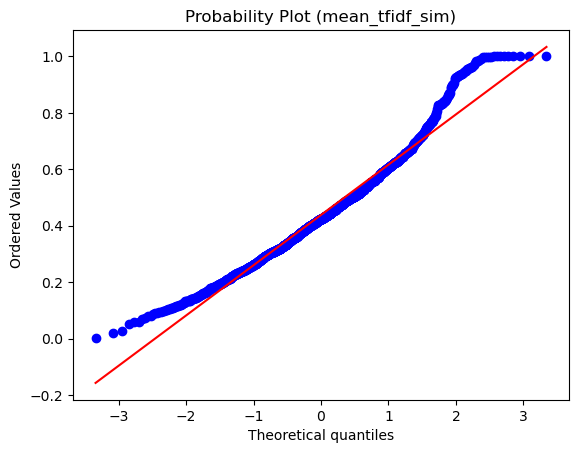

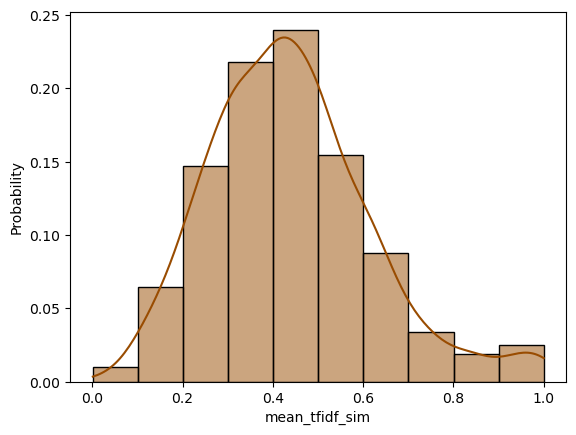

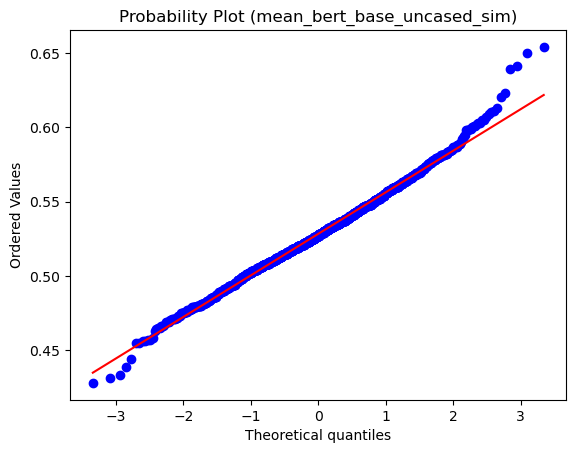

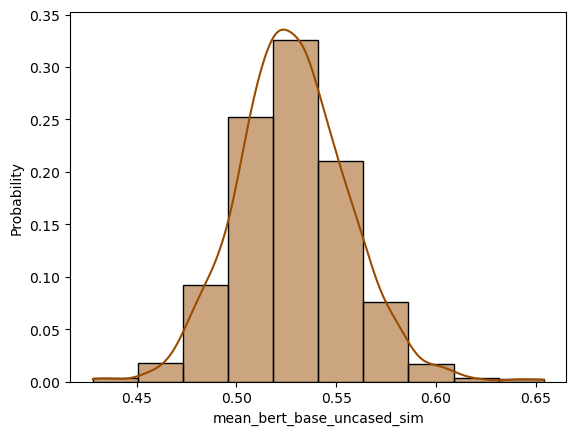

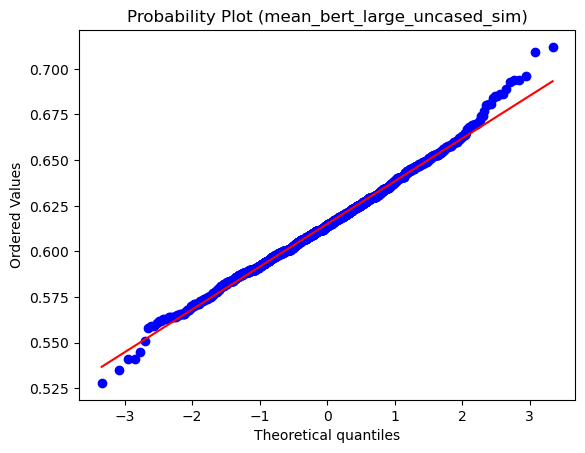

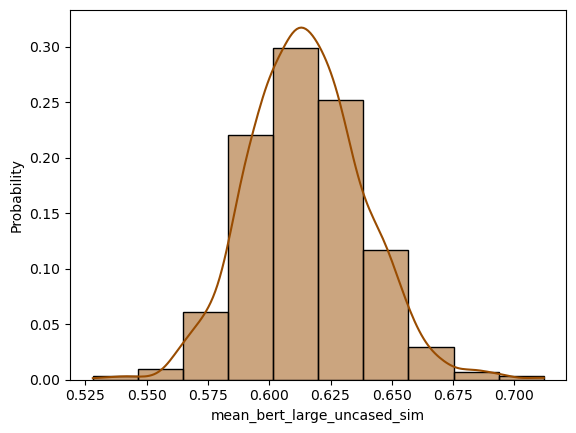

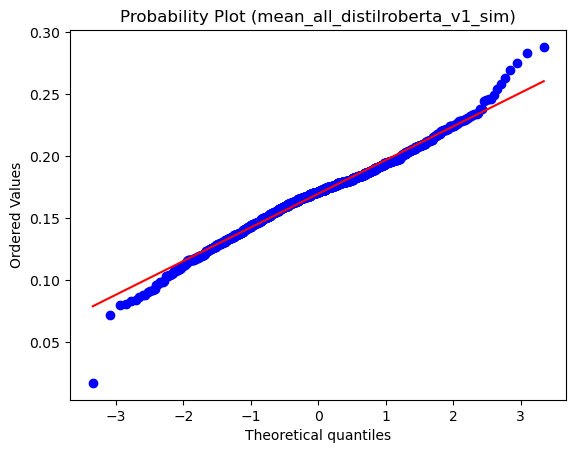

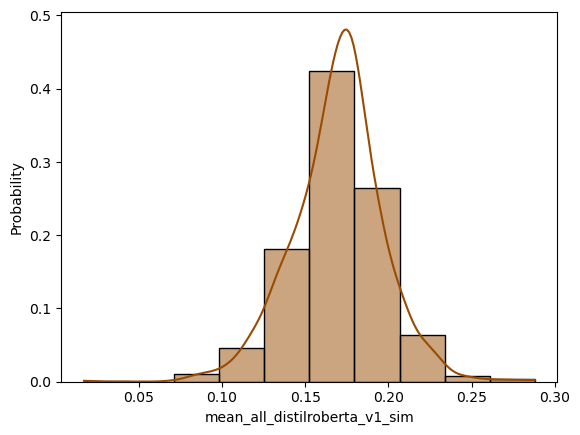

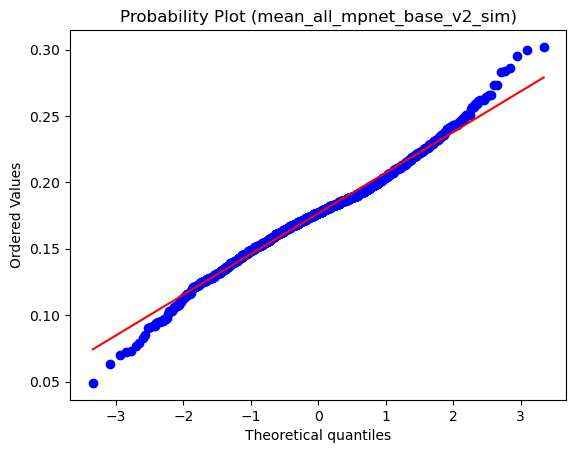

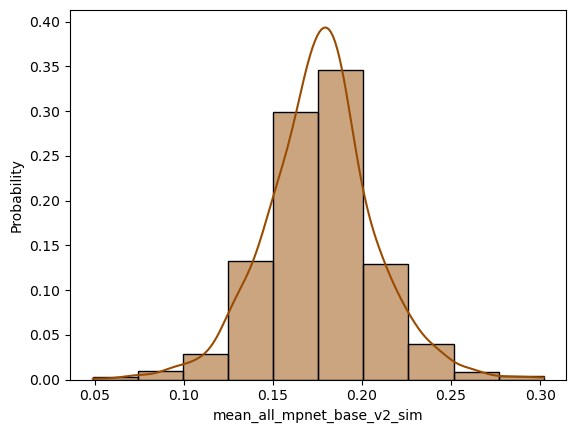

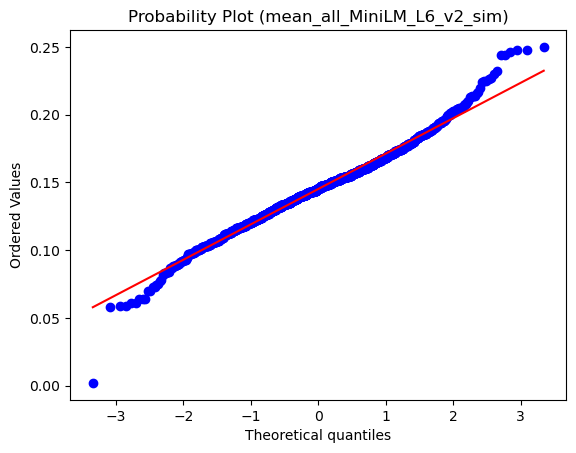

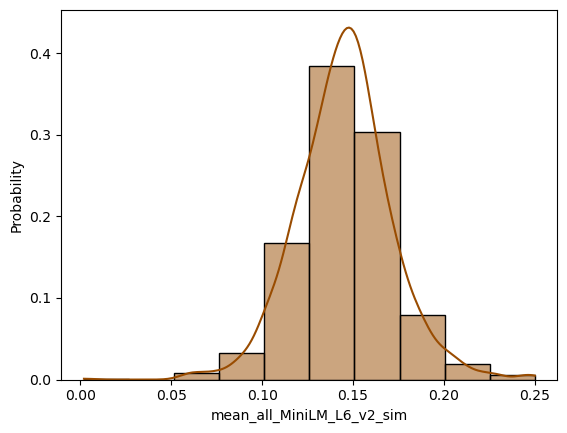

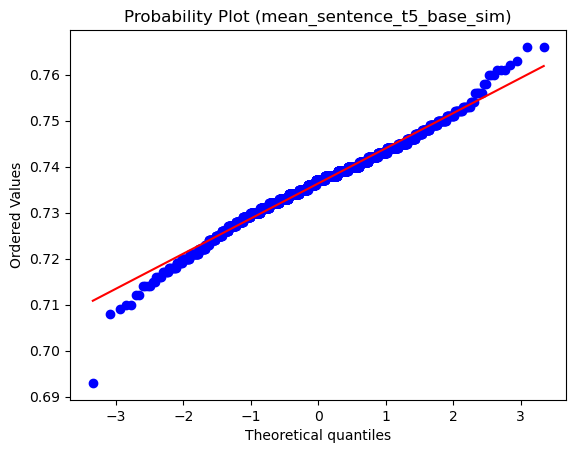

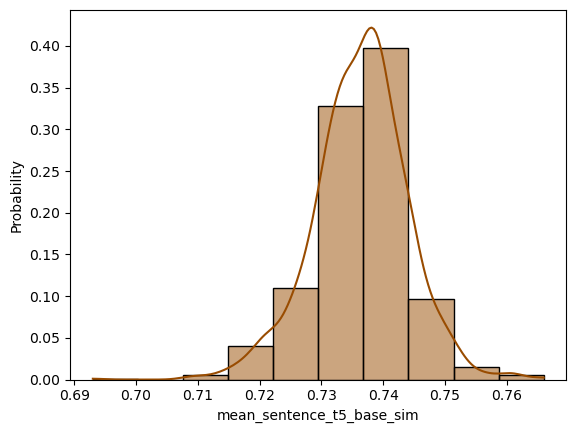

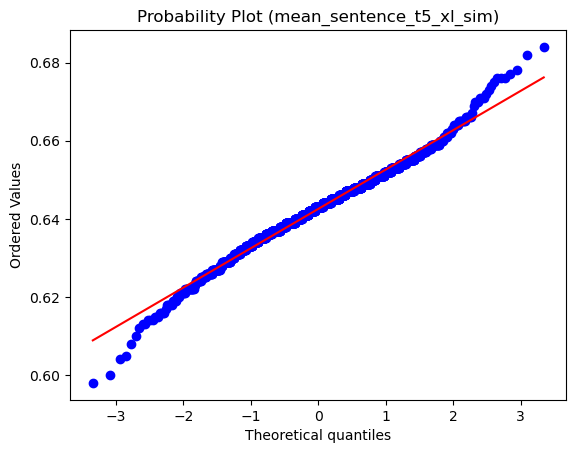

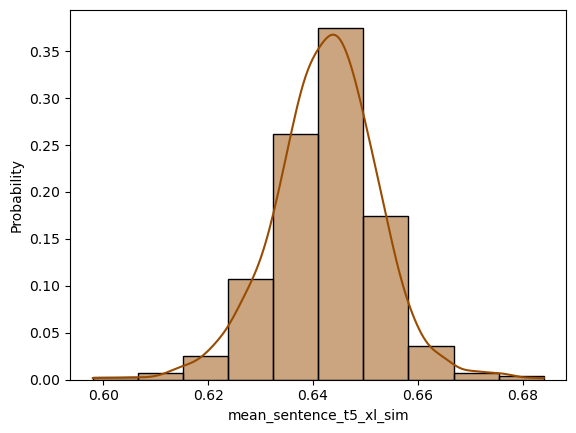

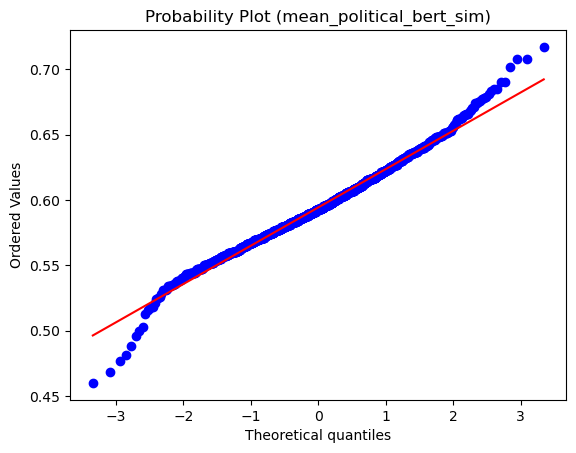

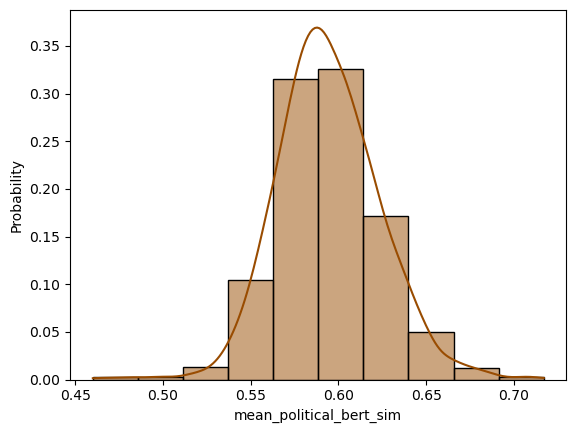

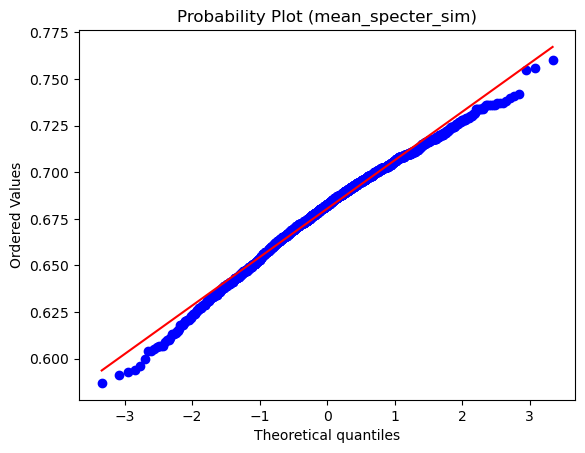

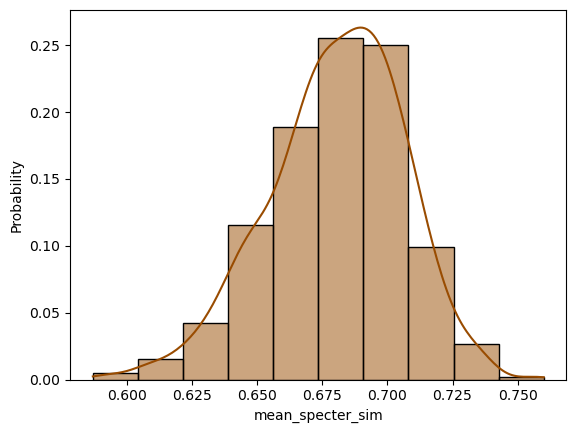

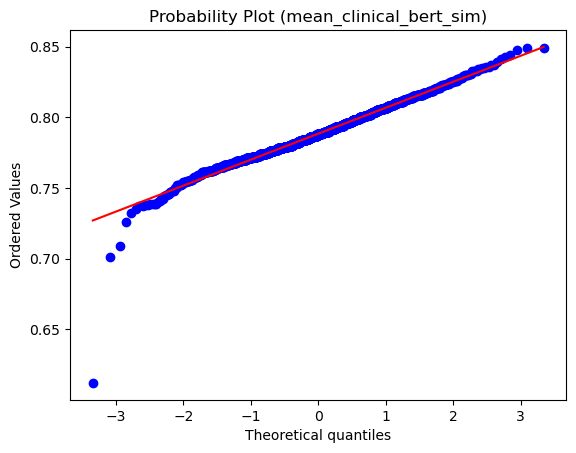

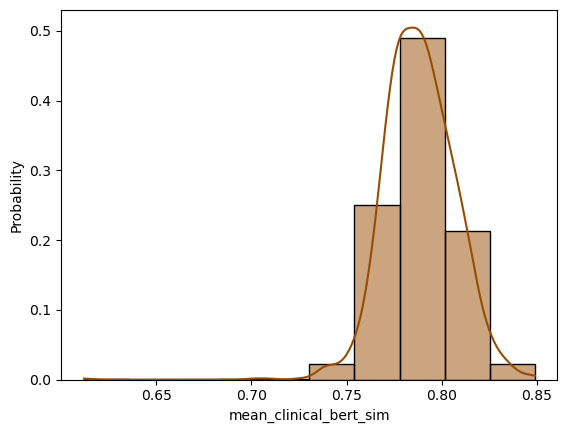

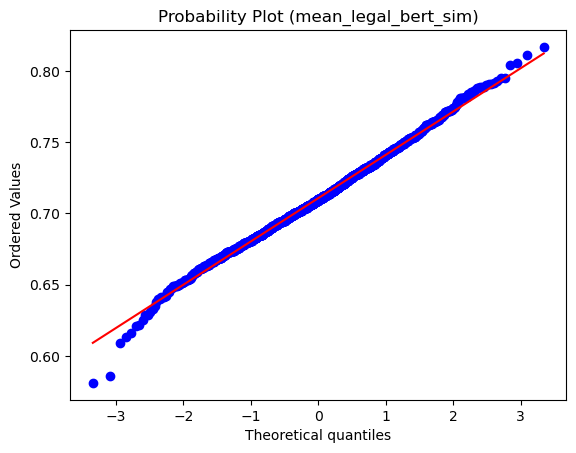

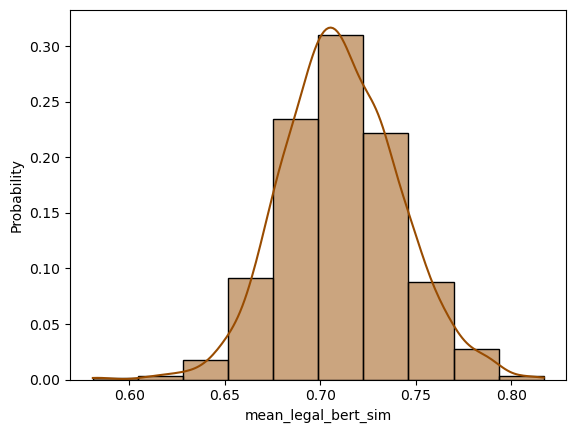

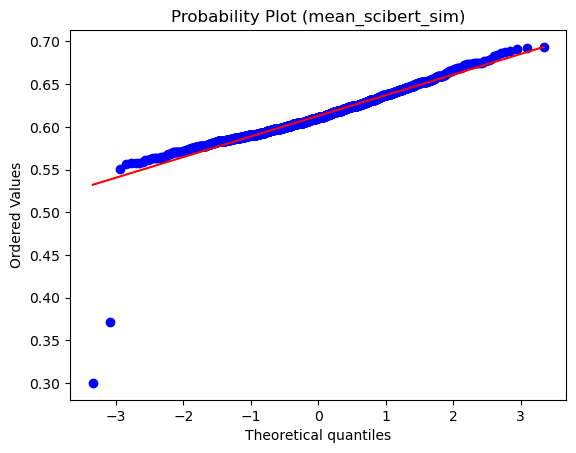

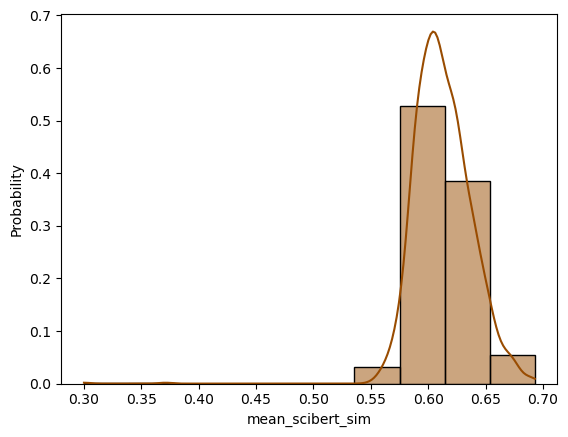

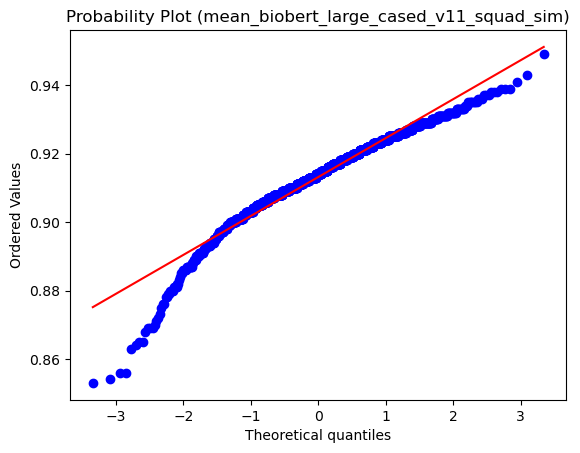

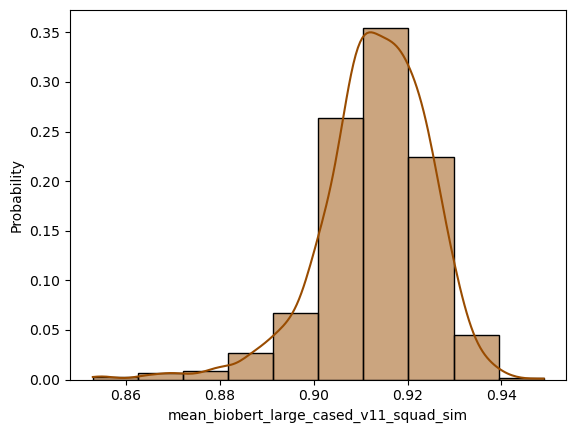

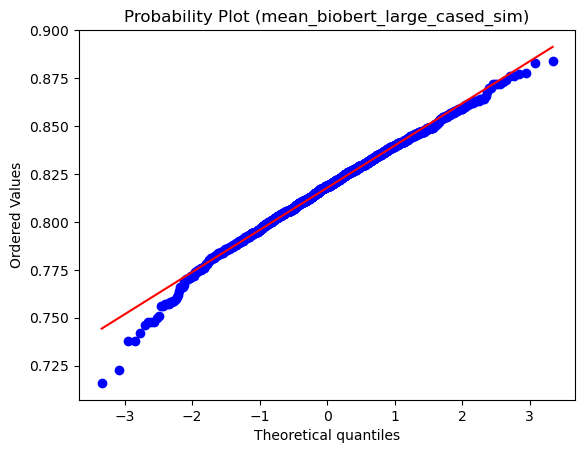

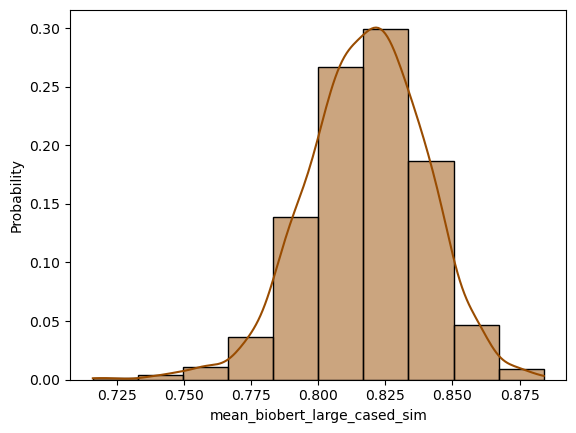

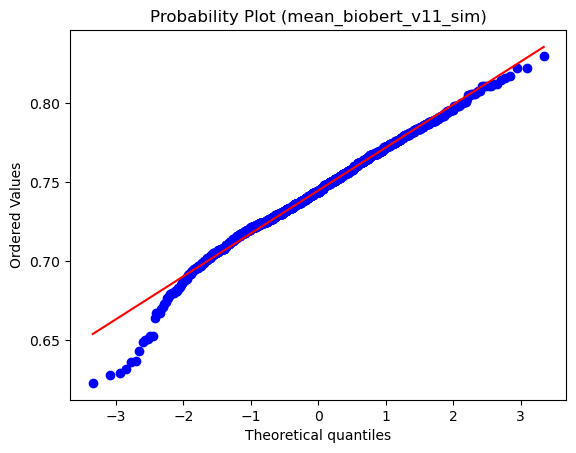

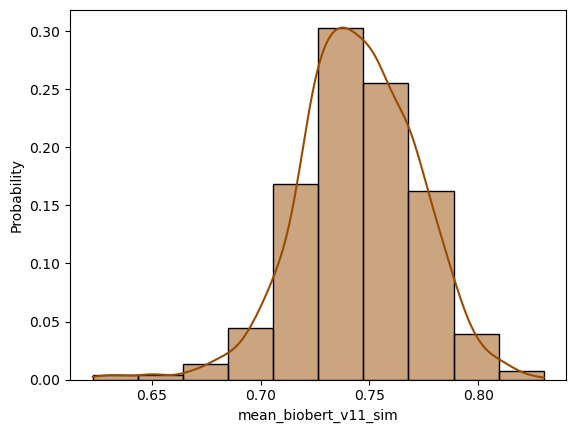

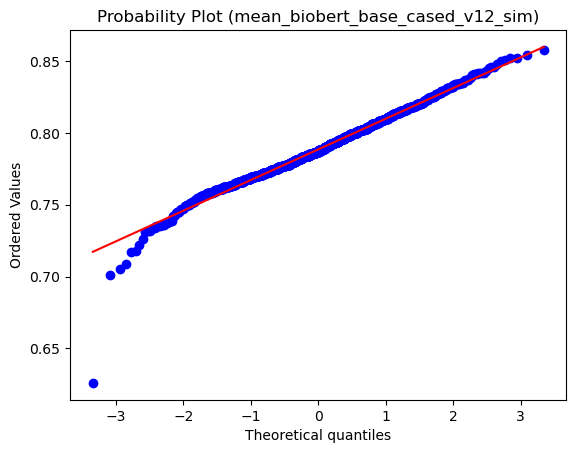

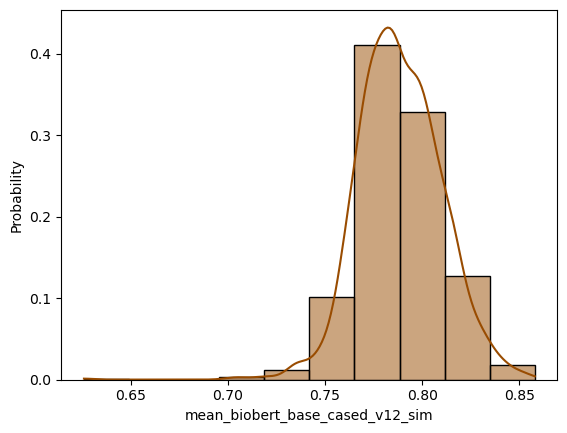

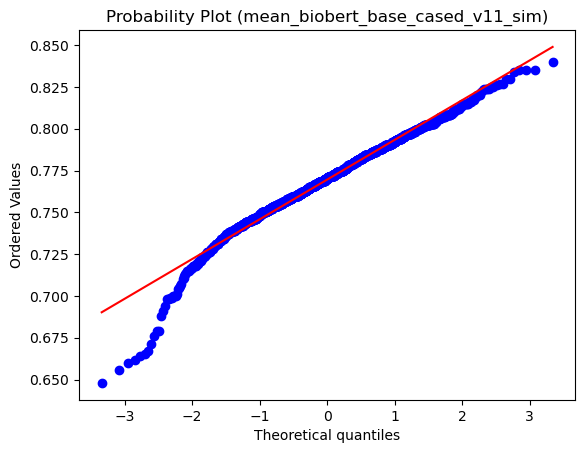

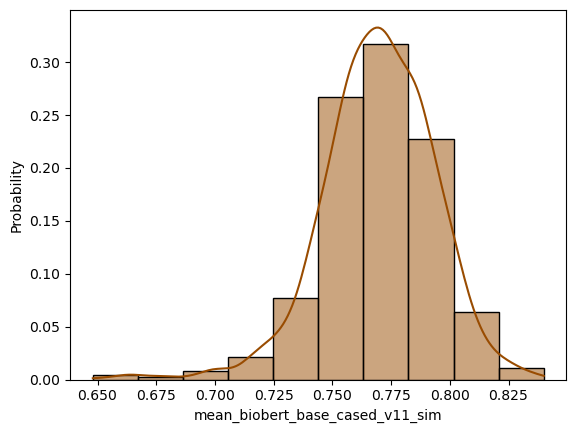

In [109]:
stat = [qqhistplot(col) for col in similarity_columns]

### Normaity test with statistical test
#### The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution.
#### The D’Agostino’s K2 test calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution

In [71]:
from scipy.stats import shapiro
from scipy.stats import normaltest

In [318]:
df_sample1 = df_sample.groupby("USApolicyCitation", group_keys=False).apply(lambda x:x.sample(frac=0.05)) 

In [253]:
final_csv_file4.USApolicyCitation.value_counts()

1     1010
2      409
3      247
4      141
5      119
6       97
7       88
8       70
9       52
10      47
Name: USApolicyCitation, dtype: int64

In [221]:
df_sample = final_csv_file4.groupby("USApolicyCitation").sample(n=30, random_state=1)

In [319]:
len(df_sample1)

20

In [276]:
final_csv_file4.groupby('USApolicyCitation').sem(ddof=1)


,total_successful_policy,successfulPolicyPercentage,mean_tfidf_sim,mean_bert_base_uncased_sim,mean_bert_large_uncased_sim,mean_all_distilroberta_v1_sim,mean_all_mpnet_base_v2_sim,mean_all_MiniLM_L6_v2_sim,mean_sentence_t5_base_sim,mean_sentence_t5_xl_sim,mean_political_bert_sim,mean_specter_sim,mean_clinical_bert_sim,mean_legal_bert_sim,mean_scibert_sim,mean_biobert_large_cased_v11_squad_sim,mean_biobert_large_cased_sim,mean_biobert_v11_sim,mean_biobert_base_cased_v12_sim,mean_biobert_base_cased_v11_sim
USApolicyCitation,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.005917,0.000891,0.000747,0.000859,0.000983,0.000840,0.000240,0.000318,0.000928,0.000837,0.000591,0.000968,0.000805,0.000361,0.000686,0.000850,0.000679,0.000738
2,0.023569,1.178464,0.008427,0.001352,0.001117,0.001325,0.001417,0.001232,0.000367,0.000482,0.001416,0.001257,0.000881,0.001468,0.001280,0.000550,0.001057,0.001292,0.001036,0.001145
3,0.055415,1.847257,0.010334,0.001728,0.001446,0.001779,0.002023,0.001695,0.000496,0.000656,0.001904,0.001550,0.001215,0.001910,0.001447,0.000798,0.001516,0.001891,0.001385,0.001708
4,0.094713,2.367820,0.013193,0.002345,0.002046,0.001959,0.002164,0.001979,0.000601,0.000797,0.002548,0.002082,0.001735,0.002606,0.002163,0.001357,0.002181,0.002894,0.002038,0.002675
5,0.137264,2.745282,0.011658,0.002339,0.002131,0.002252,0.002705,0.002362,0.000704,0.000913,0.002489,0.002320,0.001439,0.002384,0.002478,0.000887,0.001906,0.002288,0.001781,0.001971
6,0.180535,3.008853,0.015622,0.002692,0.002171,0.002532,0.002756,0.002362,0.000760,0.001027,0.002880,0.002367,0.001833,0.002713,0.001930,0.001328,0.002162,0.002806,0.002025,0.002624
7,0.212192,3.031117,0.014451,0.002709,0.002410,0.002612,0.002821,0.002422,0.000751,0.001033,0.002851,0.002482,0.002193,0.002695,0.002168,0.001624,0.002356,0.003440,0.002342,0.003268
8,0.273578,3.419720,0.014580,0.003212,0.002556,0.002894,0.003113,0.002721,0.001025,0.001310,0.003368,0.003015,0.002105,0.003355,0.002535,0.001425,0.002540,0.003341,0.002385,0.002940
9,0.351053,3.900802,0.018384,0.003975,0.003369,0.003823,0.003910,0.003588,0.001032,0.001345,0.004337,0.004008,0.002615,0.003891,0.003646,0.001462,0.003078,0.003626,0.003259,0.003412


In [257]:
def normalityTest(col_name:str):
    # Shapiro-Wilk test 
    stat, p = shapiro(df_sample1[col_name])
    print('Statistics=%.3f, p=%.3f' % (stat, p))

    '''
    # D’Agostino’s K2 test
    stat, p = normaltest(final_csv_file4['mean_tfidf_sim'])
    print('Statistics=%.3f, p=%.3f' % (stat, p))  

    '''

    alpha = 0.05
    if p > alpha:
     print(col_name,': Sample looks Gaussian (fail to reject H0)')
    else:
     print(col_name,': Sample does not look Gaussian (reject H0)')
    
    return None

In [258]:
stat = [normalityTest(col) for col in similarity_columns]

Statistics=0.913, p=0.074
mean_tfidf_sim : Sample looks Gaussian (fail to reject H0)
Statistics=0.958, p=0.505
mean_bert_base_uncased_sim : Sample looks Gaussian (fail to reject H0)
Statistics=0.936, p=0.199
mean_bert_large_uncased_sim : Sample looks Gaussian (fail to reject H0)
Statistics=0.939, p=0.230
mean_all_distilroberta_v1_sim : Sample looks Gaussian (fail to reject H0)
Statistics=0.946, p=0.309
mean_all_mpnet_base_v2_sim : Sample looks Gaussian (fail to reject H0)
Statistics=0.901, p=0.043
mean_all_MiniLM_L6_v2_sim : Sample does not look Gaussian (reject H0)
Statistics=0.976, p=0.870
mean_sentence_t5_base_sim : Sample looks Gaussian (fail to reject H0)
Statistics=0.965, p=0.642
mean_sentence_t5_xl_sim : Sample looks Gaussian (fail to reject H0)
Statistics=0.987, p=0.990
mean_political_bert_sim : Sample looks Gaussian (fail to reject H0)
Statistics=0.961, p=0.555
mean_specter_sim : Sample looks Gaussian (fail to reject H0)
Statistics=0.946, p=0.306
mean_clinical_bert_sim : Sampl